In [1]:
import pandas as pd
import numpy as np

In [2]:

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)


In [3]:
# source : INSEE. Prix moyens de vente de détail
# https://www.insee.fr/fr/statistiques/series/103157792

Monthly_RP_df_orig = pd.read_excel("famille_IPC-PM-2015_15042022.xlsx", sheet_name="valeurs_mensuelles") 

/usr/lib/python3/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
def normalize_col_name(col):
    lRemoveThese = ["Prix moyens mensuels de vente au détail en métropole - ",
                    "- Série arrêtée",
                    " (1 kg) "]
    col1 = col
    for x in lRemoveThese:
        col1 = col1.replace(x, "")
    return col1

def to_number(x):
    if(type(x) == str):
        return np.nan
    return np.float64(x)
    
data_tr = Monthly_RP_df_orig.values.T
cols = data_tr[0]
print(cols[:10])
dates = Monthly_RP_df_orig.columns[4:]
print(dates)
df1 = pd.DataFrame()
df1['Month'] = dates
df1['Month'] = df1['Month'].apply(np.datetime64)
for (i, col) in enumerate(cols):
    col1 = normalize_col_name(col)
    # print("XXXXXXXXXXXXXXX", (col, col1))
    df1[col1] = data_tr[4:, i]
    df1[col1] = df1[col1].apply(to_number)
    df1[col1] = df1[col1].astype(np.float64)

['Prix moyens mensuels de vente au détail en métropole - Cabillaud en tranche (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Filet de cabillaud (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Lieu noir en tranche (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Merluchon ou colinot (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Thon rouge (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Asperges (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Concombres (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Abricots (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Cerises (1 kg) - Série arrêtée'
 'Prix moyens mensuels de vente au détail en métropole - Fraises (1 kg) - Série arrêtée']
Index(['1992-01', '1992-02', '1992-03', '1992-04', 

/tmp/ipykernel_211211/2892890398.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[col1] = data_tr[4:, i]


In [5]:
df1

Month  Cabillaud en tranche  Filet de cabillaud  \
0   1992-01-01                   NaN                 NaN   
1   1992-02-01                   NaN                 NaN   
2   1992-03-01                   NaN                 NaN   
3   1992-04-01                   NaN                 NaN   
4   1992-05-01                   NaN                 NaN   
..         ...                   ...                 ...   
358 2021-11-01                   NaN                 NaN   
359 2021-12-01                   NaN                 NaN   
360 2022-01-01                   NaN                 NaN   
361 2022-02-01                   NaN                 NaN   
362 2022-03-01                   NaN                 NaN   

     Lieu noir en tranche  Merluchon ou colinot  Thon rouge  Asperges  \
0                     NaN                   NaN         NaN       NaN   
1                     NaN                   NaN         NaN       NaN   
2                     NaN                   NaN         NaN       NaN   
3                     NaN                   NaN         NaN       NaN   
4                     NaN                   NaN         NaN       NaN   
..                    ...                   ...         ...       ...   
358                   NaN                   NaN         NaN       NaN   
359                   NaN                   NaN         NaN       NaN   
360                   NaN                   NaN         NaN       NaN   
361                   NaN                   NaN         NaN       NaN   
362                   NaN                   NaN         NaN       NaN   

     Concombres  Abricots  Cerises  Fraises  Melons  \
0           NaN       NaN      NaN      NaN     NaN   
1           NaN       NaN      NaN      NaN     NaN   
2           NaN       NaN      NaN      NaN     NaN   
3           NaN       NaN      NaN      NaN     NaN   
4           NaN       NaN      NaN      NaN     NaN   
..          ...       ...      ...      ...     ...   
358         NaN       NaN      NaN      NaN     NaN   
359         NaN       NaN      NaN      NaN     NaN   
360         NaN       NaN      NaN      NaN     NaN   
361         NaN       NaN      NaN      NaN     NaN   
362         NaN       NaN      NaN      NaN     NaN   

     Bégonia d'environ 25 cm de diamètre (le pot)   \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   
..                                             ...   
358                                            NaN   
359                                            NaN   
360                                            NaN   
361                                            NaN   
362                                            NaN   

     Bouquet de roses (la rose)   Truites  Boeuf : macreuse à braiser  \
0                            NaN      NaN                        7.27   
1                            NaN      NaN                        7.28   
2                            NaN      NaN                        7.29   
3                            NaN      NaN                        7.30   
4                            NaN      NaN                        7.29   
..                           ...      ...                         ...   
358                          NaN      NaN                         NaN   
359                          NaN      NaN                         NaN   
360                          NaN      NaN                         NaN   
361                          NaN      NaN                         NaN   
362                          NaN      NaN                         NaN   

     Boeuf : bifteck haché  Pain parisien  Croissant ordinaire   \
0                     9.29           1.63                  0.49   
1                     9.29           1.64                  0.49   
2                     9

In [6]:
df1.describe().transpose().head(1000)

count        mean  \
Cabillaud en tranche                                216.0   15.640093   
Filet de cabillaud                                  216.0   15.485417   
Lieu noir en tranche                                213.0    9.257089   
Merluchon ou colinot                                215.0   10.974837   
Thon rouge                                          125.0   19.213360   
Asperges                                             70.0    7.243000   
Concombres                                          125.0    2.111280   
Abricots                                             54.0    3.676852   
Cerises                                              53.0    6.306226   
Fraises                                              87.0    7.887356   
Melons                                               90.0    2.669778   
Bégonia d'environ 25 cm de diamètre (le pot)        216.0   10.012731   
Bouquet de roses (la rose)                          215.0    0.873163   
Truites                                             216.0    8.338241   
Boeuf : macreuse à braiser                          108.0    7.442593   
Boeuf : bifteck haché                               120.0    9.393250   
Pain parisien                                       288.0    2.125521   
Croissant ordinaire                                 168.0    0.535714   
Veau : rôti noix, sous-noix ou noix pâtissière      288.0   17.936910   
Agneau : côtes découvertes                          288.0   15.170417   
Agneau : gigot raccourci                            288.0   14.300625   
Jambon choix vendu sous plastique de 2 à 6 tran...  120.0   11.842833   
Poulet industriel sans label                        108.0    2.630278   
Yaourt nature (les 4)                               120.0    0.752583   
Yaourt aromatisé (les 8)                            120.0    1.259167   
Lessive en poudre non concentrée (5 kg)              96.0    8.624062   
Poudre de lavage pour lave-vaisselle (3 kg)          84.0    7.544524   
Film négatif couleur, format 24 x 36, 24 poses ...  108.0    4.799907   
Supercarburant au potassium (ARS) (1 litre)         157.0    1.001911   
Shampooing et coupe mode pour homme                 288.0   17.160590   
Bière blonde spéciale (25 cl) en salle              108.0    2.331389   
Premier tirage d'un film couleur 24 x 36, 24 po...  240.0   12.881292   
Tasse de café simple au comptoir                     96.0    0.869167   
Saumon d'élevage                                    212.0    8.863443   
Shampooing-coupe-brushing pour femme                192.0   30.796458   
Pneumatique pour auto : tubeless 165 x 13           156.0   63.731154   
Pneumatique pour auto : tubeless 175/65 R 14         83.0   74.218434   
Nuitée dans un hôtel 3 étoiles                      108.0  118.143241   
Nuitée et petit-déjeuner dans un hôtel 1 étoile      72.0   55.224167   
Pêches, brugnons, nectarines                         85.0    3.129176   
Raisins                                              88.0    3.352614   
Huîtres creuses gros calibre (une douzaine)         161.0    7.912671   
Salades (pièce)                                     216.0    1.319583   
Botte d'oeillets                                    216.0    0.541944   
Tasse de café en salle                              192.0    1.358437   
Eau distribuée (120 m3), TTC                         12.0  187.798333   
Eau assainissement (120 m3), TTC                     12.0  107.855000   
Carrosserie automobile : une heure de main d'oe...   72.0   37.633194   
Avocat                                              223.0    4.395471   
Kiwi                                                153.0    3.672418   
Artichauts                                          171.0    3.138187   
Chou-fleur                                          228.0    1.432895   
Nuitée dans un hôtel 2 étoiles                      144.0   53.865694   
Nuitée dans un hôtel 1 étoile                       120.0   35.153000   
Distribution de 120 m3 d'eau (abonnem

In [7]:
petit_dej = ['Croissant ordinaire', 
             'Pain baguette (1 kg)', 
             'Bouquet de roses (la rose)', 
             'Café moulu 100% arabica (250 g)']

In [8]:
df1.to_csv("Food_Retail_Prices_FRANCE.csv")

In [9]:
df1['Month'].describe()

/tmp/ipykernel_211211/666474716.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Month'].describe()


count                     363
unique                    363
top       1992-01-01 00:00:00
freq                        1
first     1992-01-01 00:00:00
last      2022-03-01 00:00:00
Name: Month, dtype: object

In [10]:
df1['Month']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
358   2021-11-01
359   2021-12-01
360   2022-01-01
361   2022-02-01
362   2022-03-01
Name: Month, Length: 363, dtype: datetime64[ns]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Columns: 153 entries, Month to Rose à l'unité
dtypes: datetime64[ns](1), float64(152)
memory usage: 434.0 KB


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


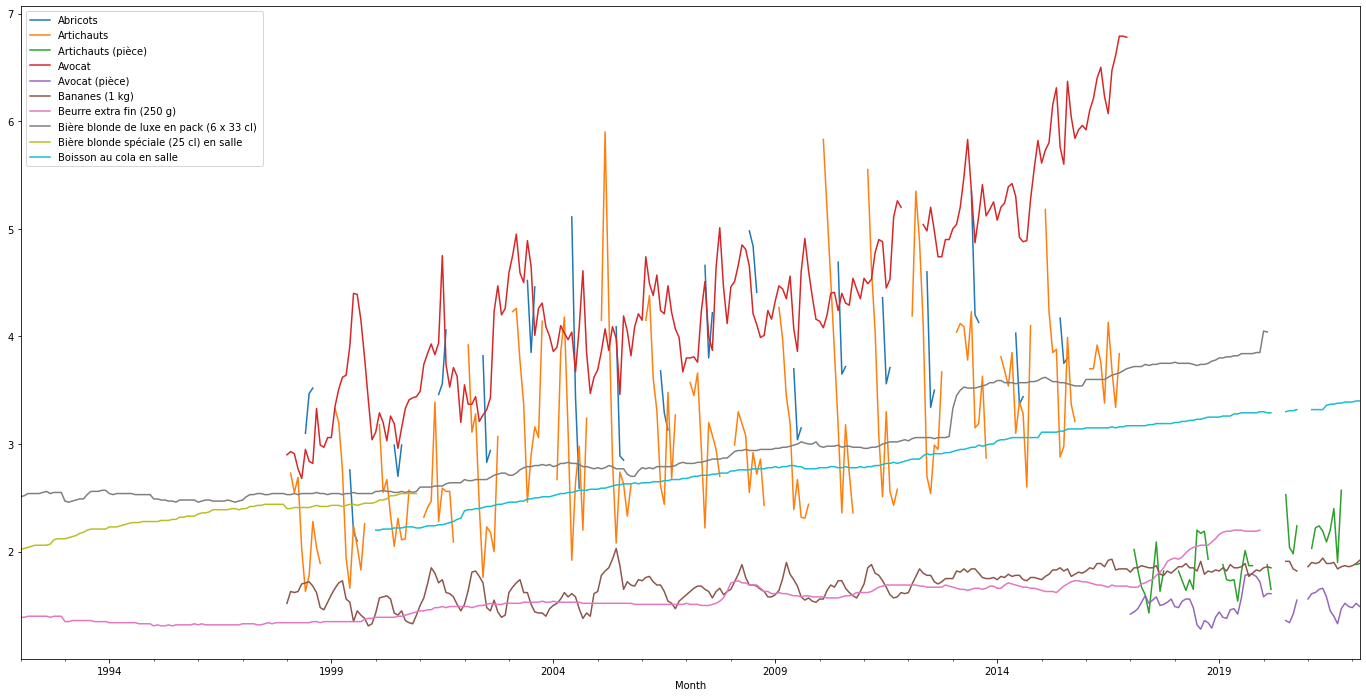

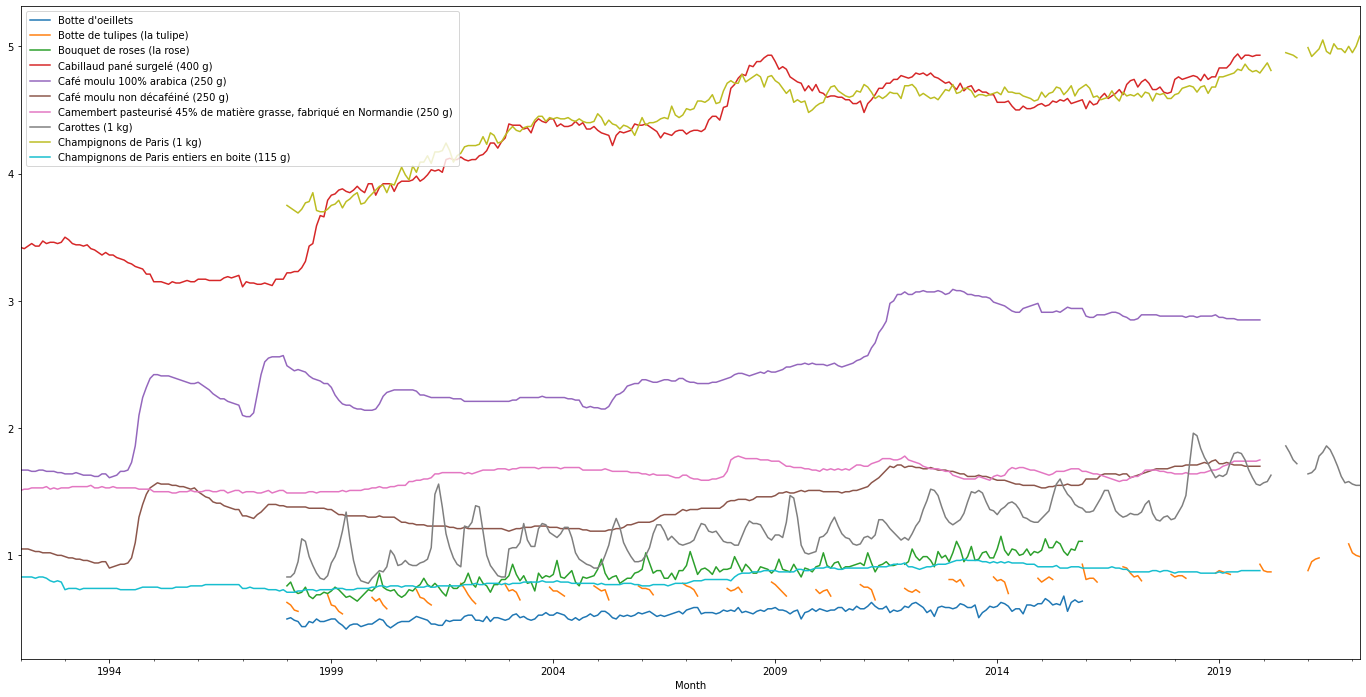

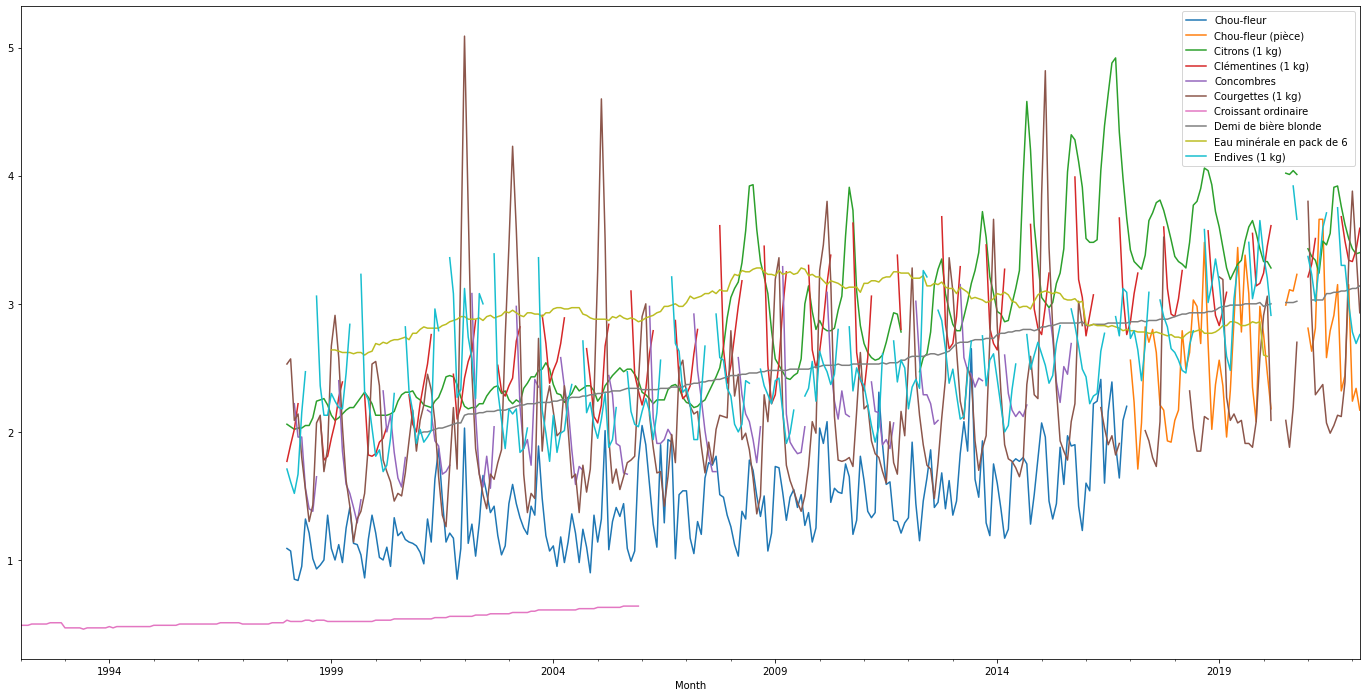

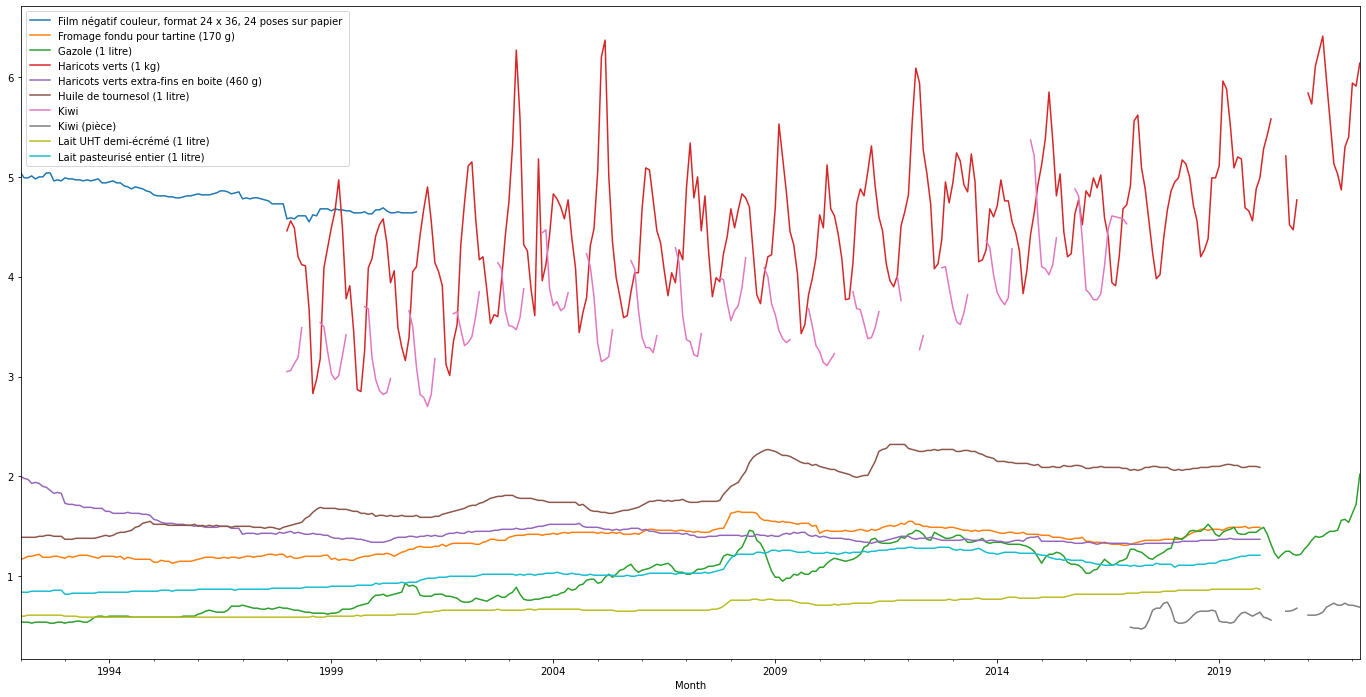

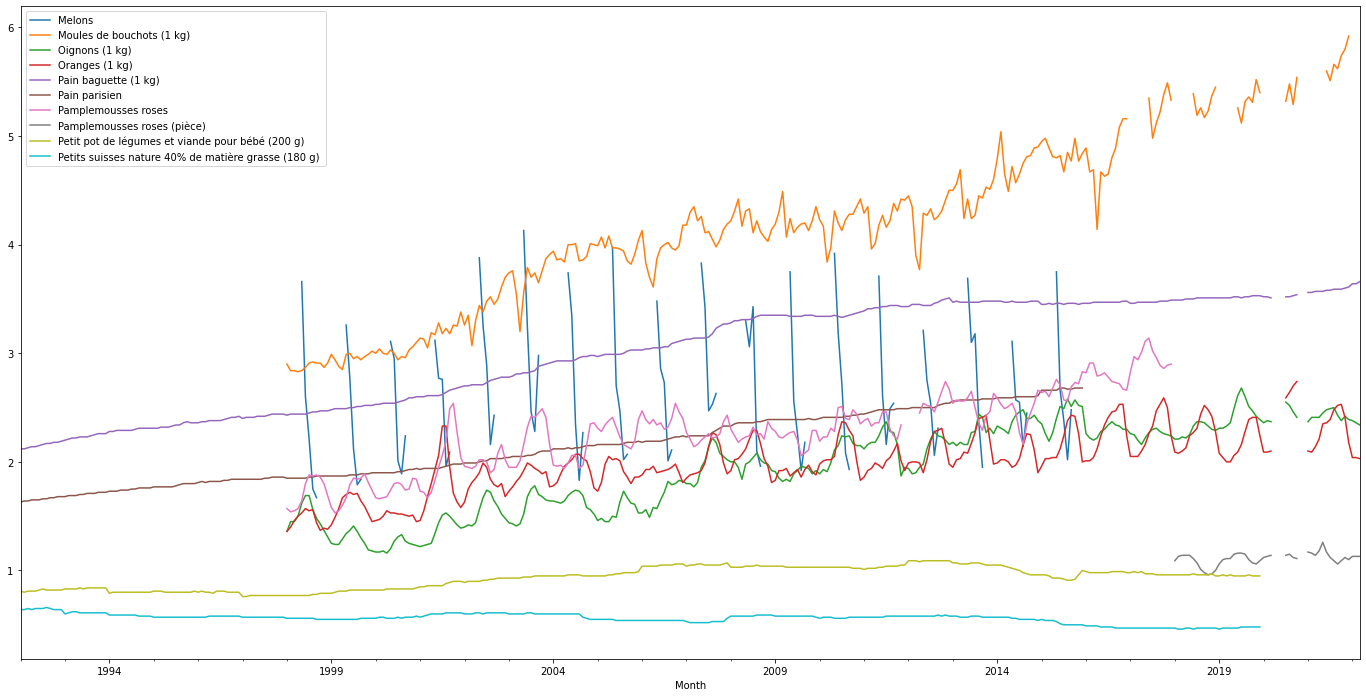

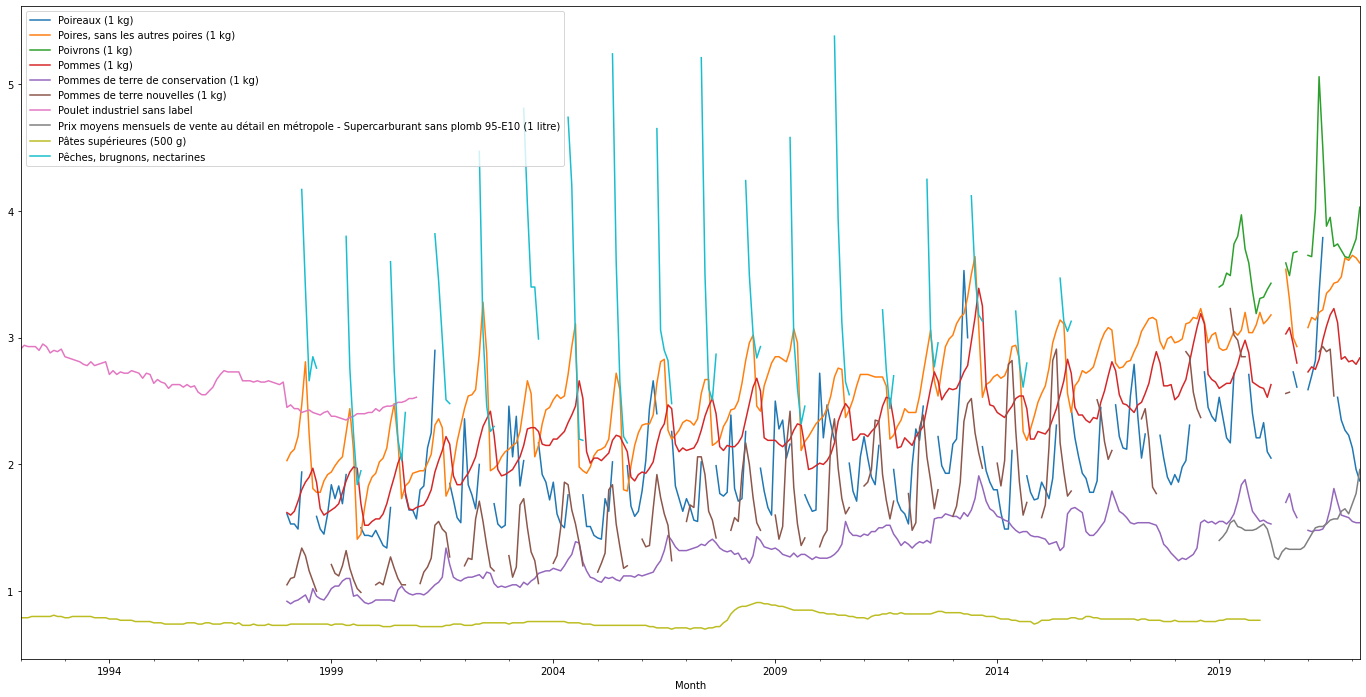

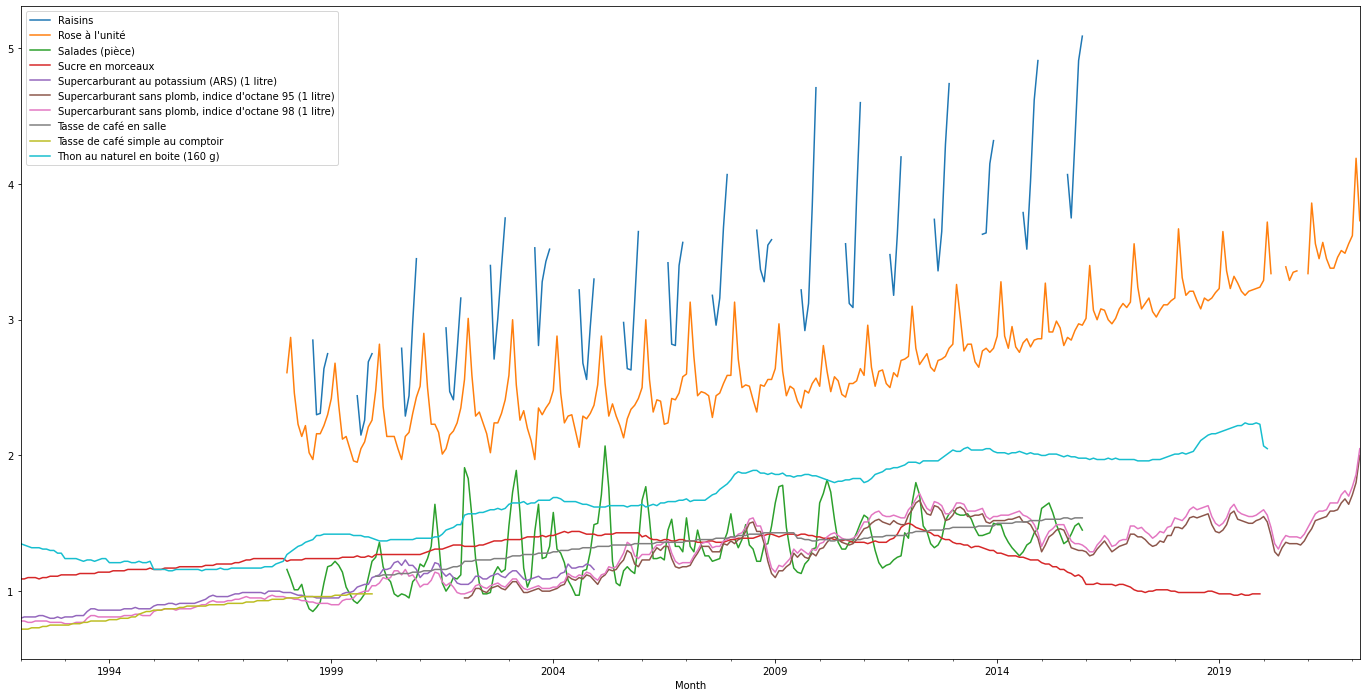

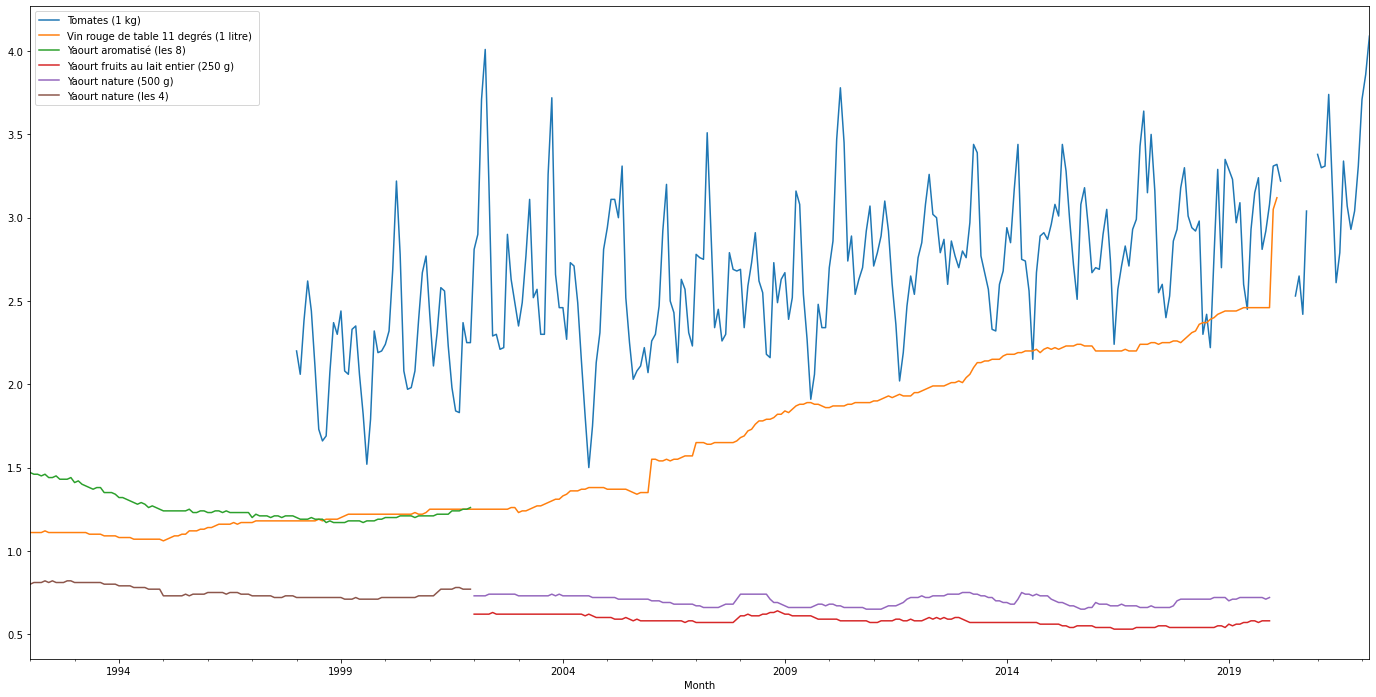

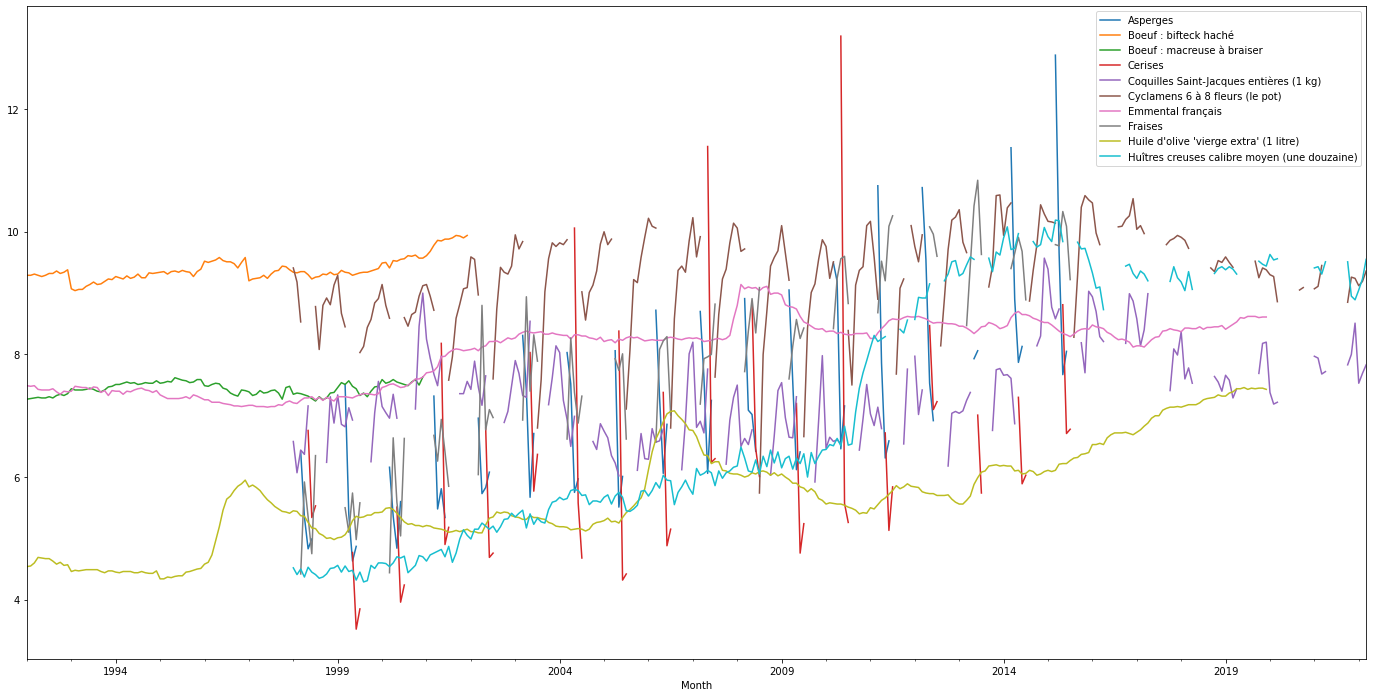

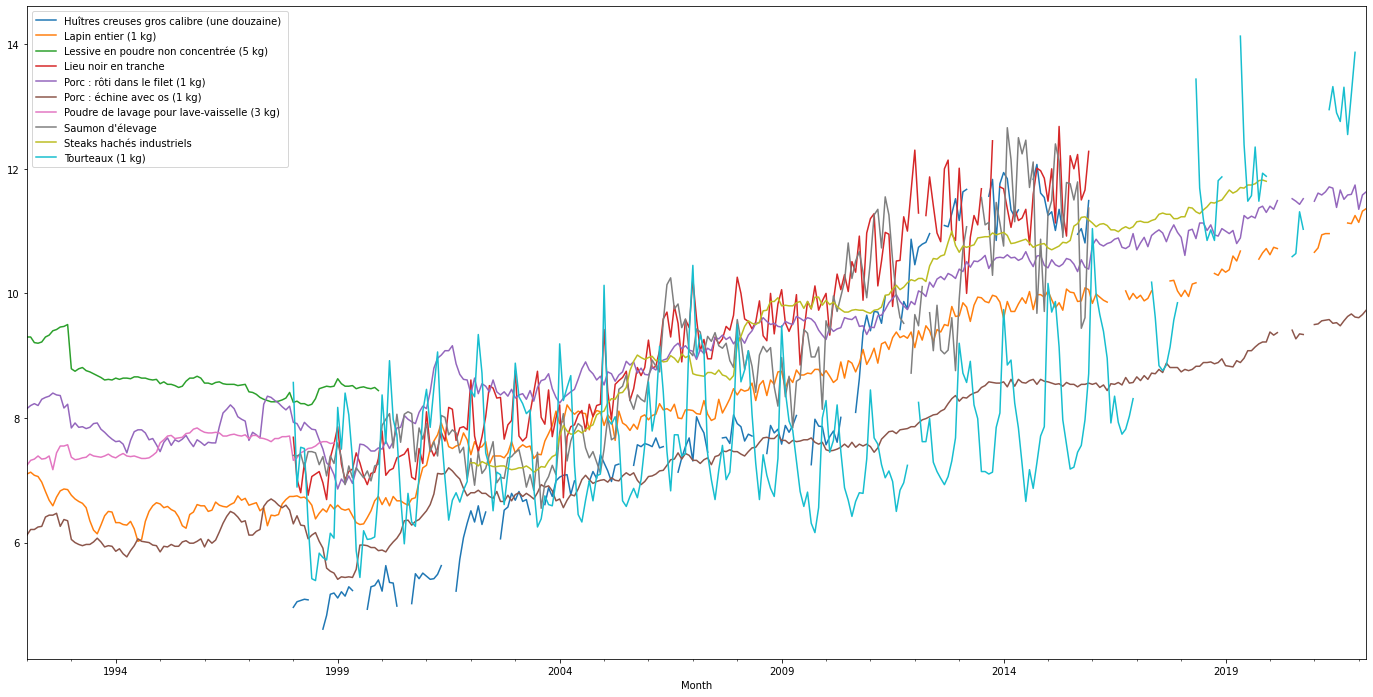

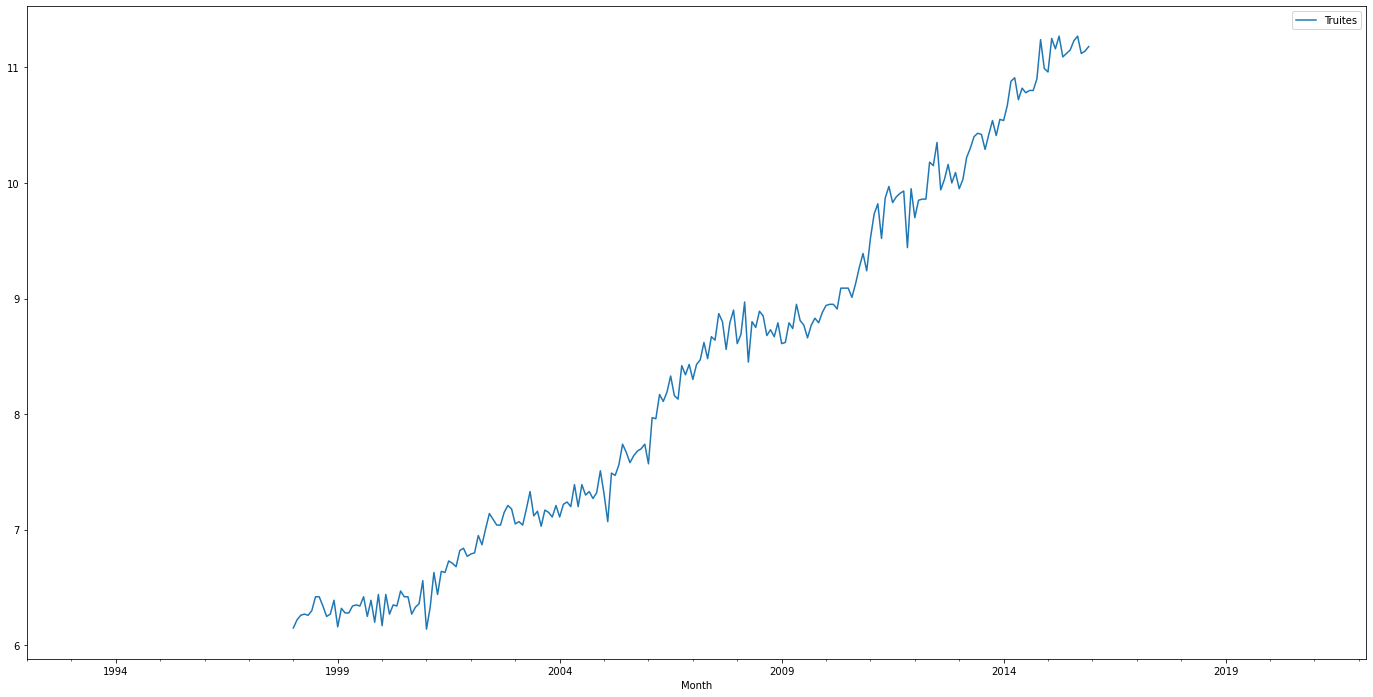

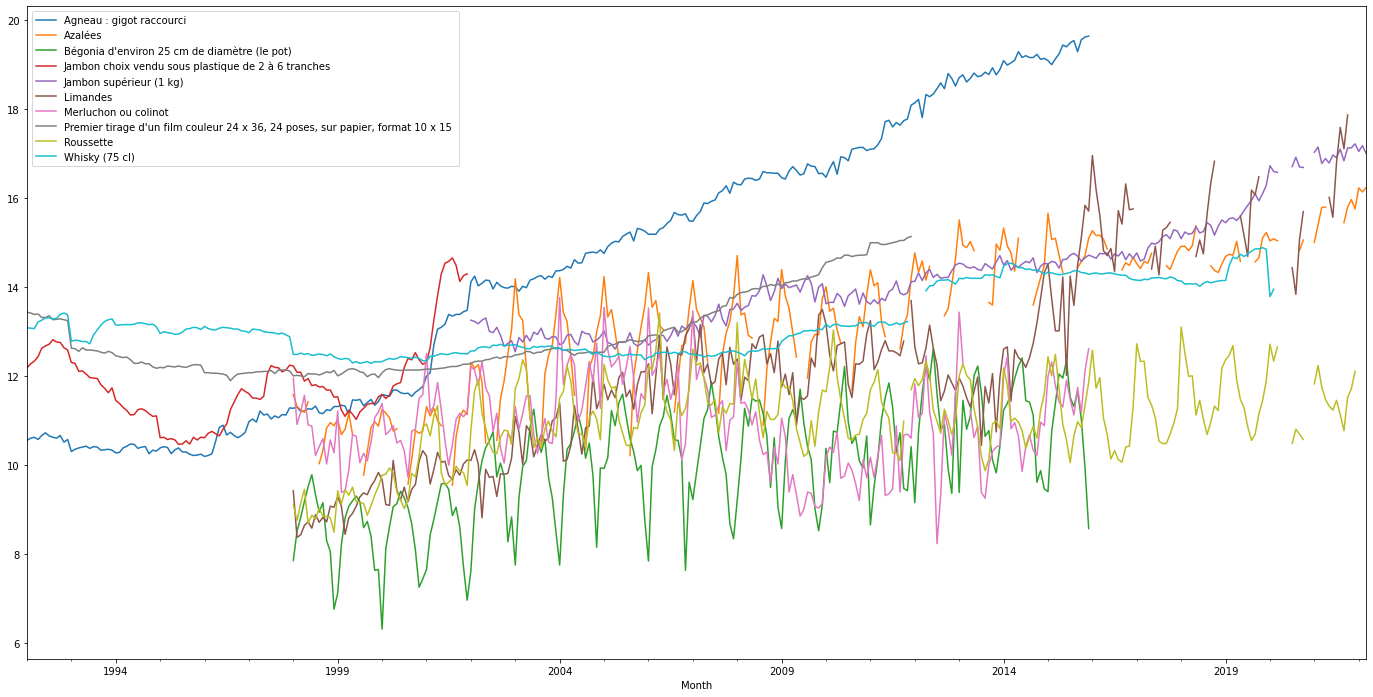

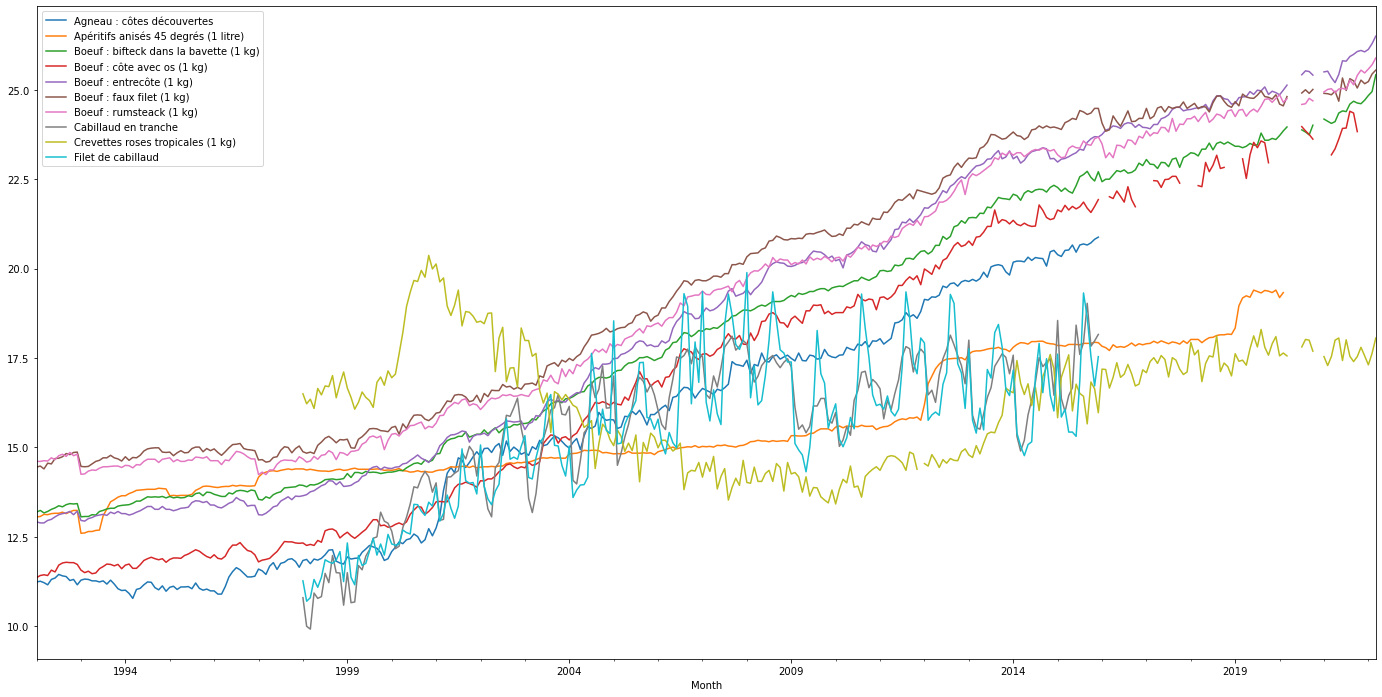

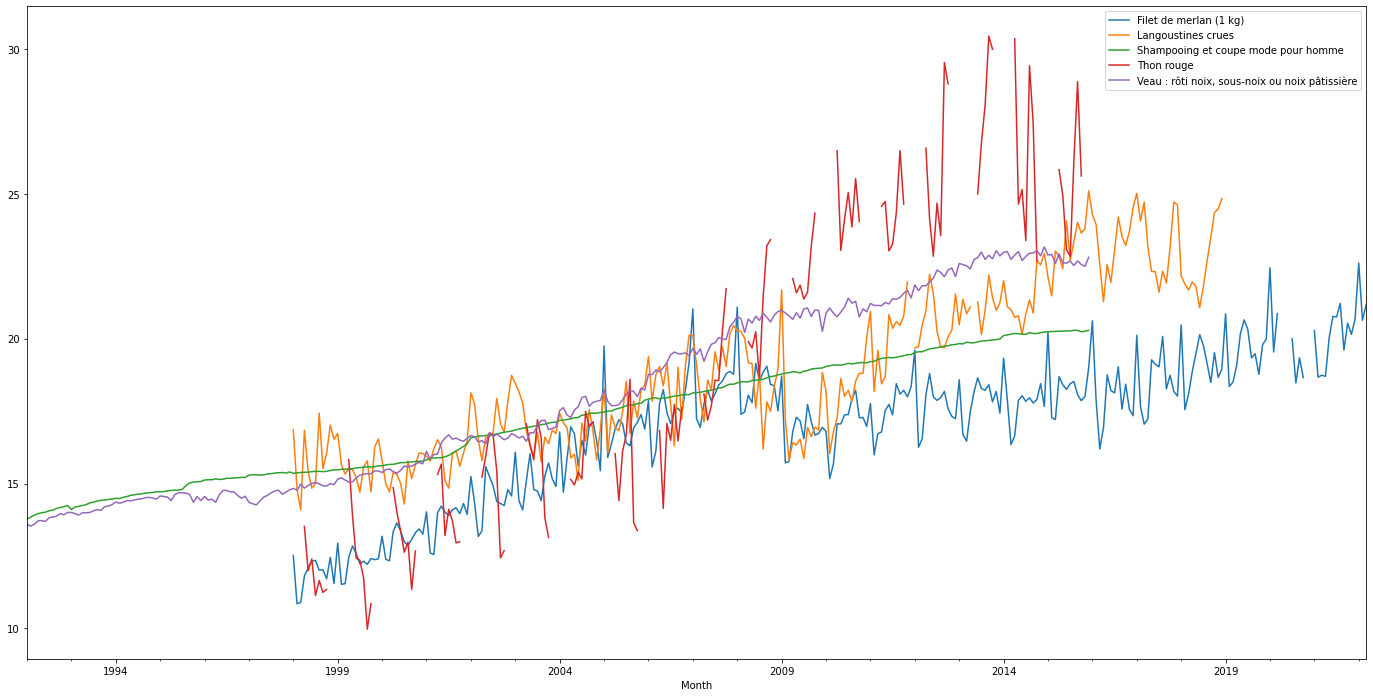

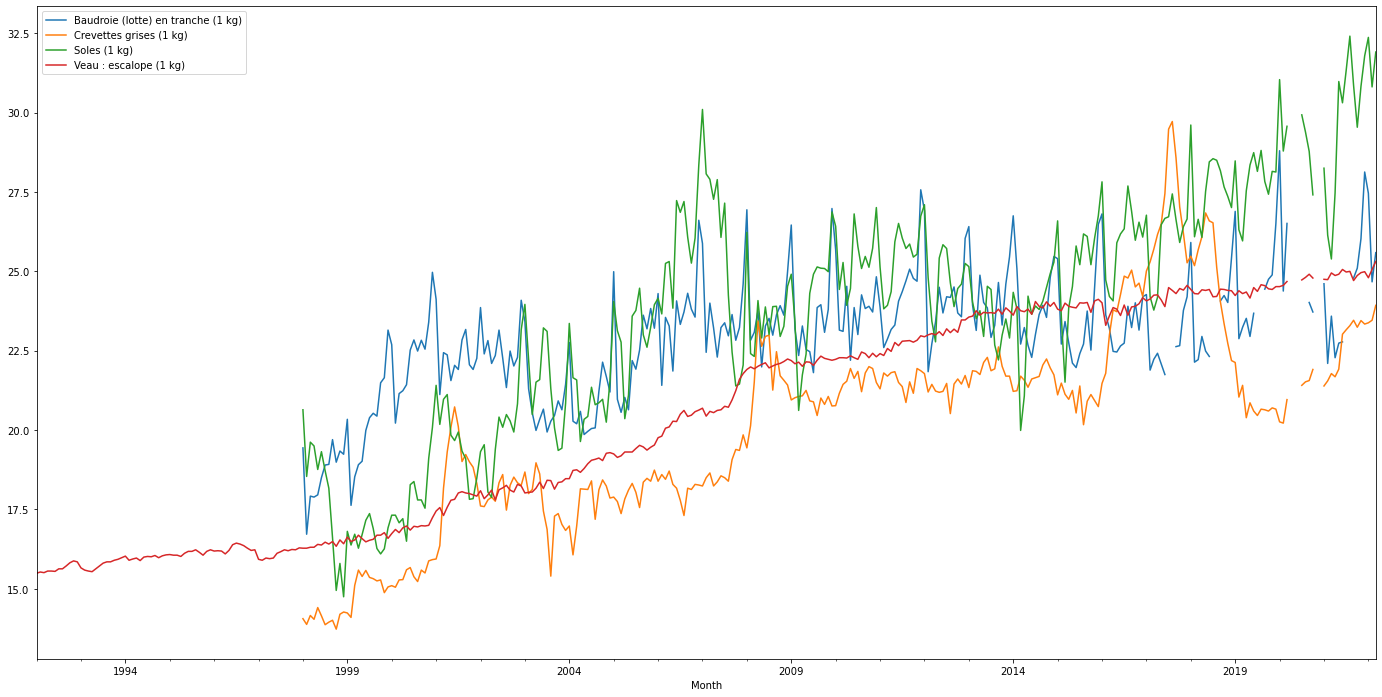

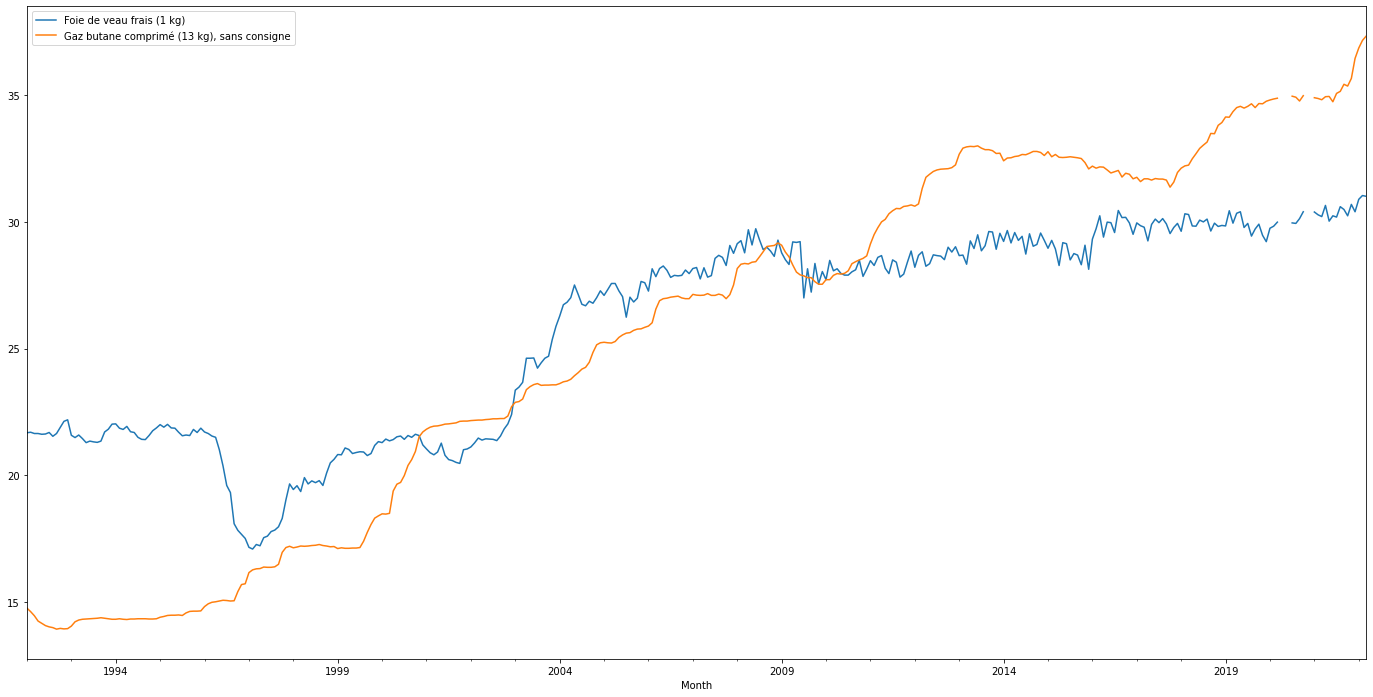

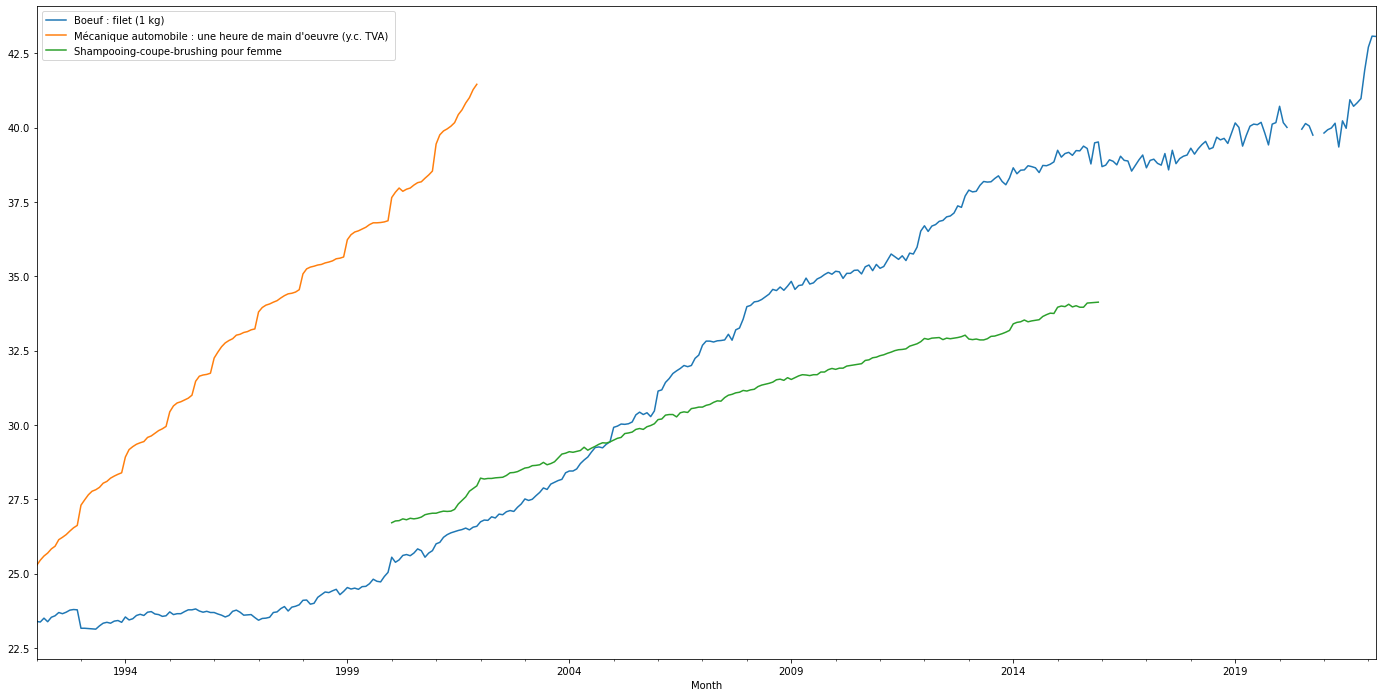

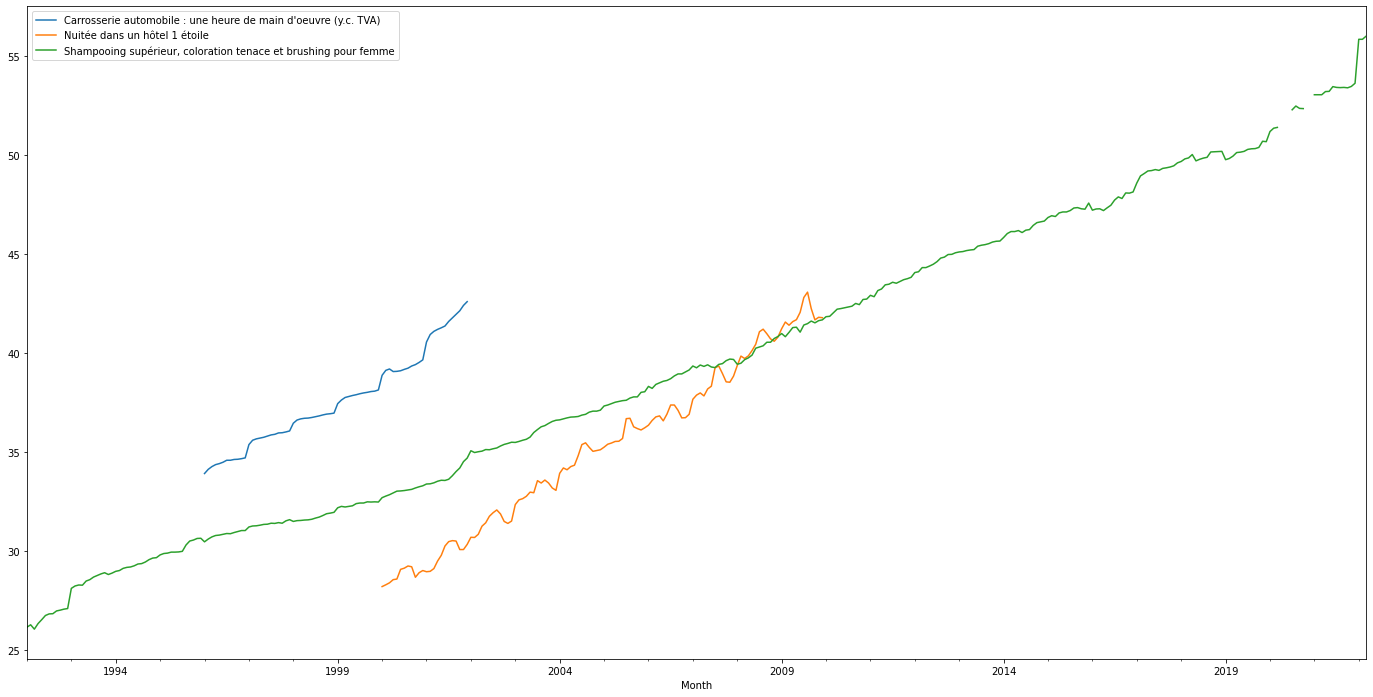

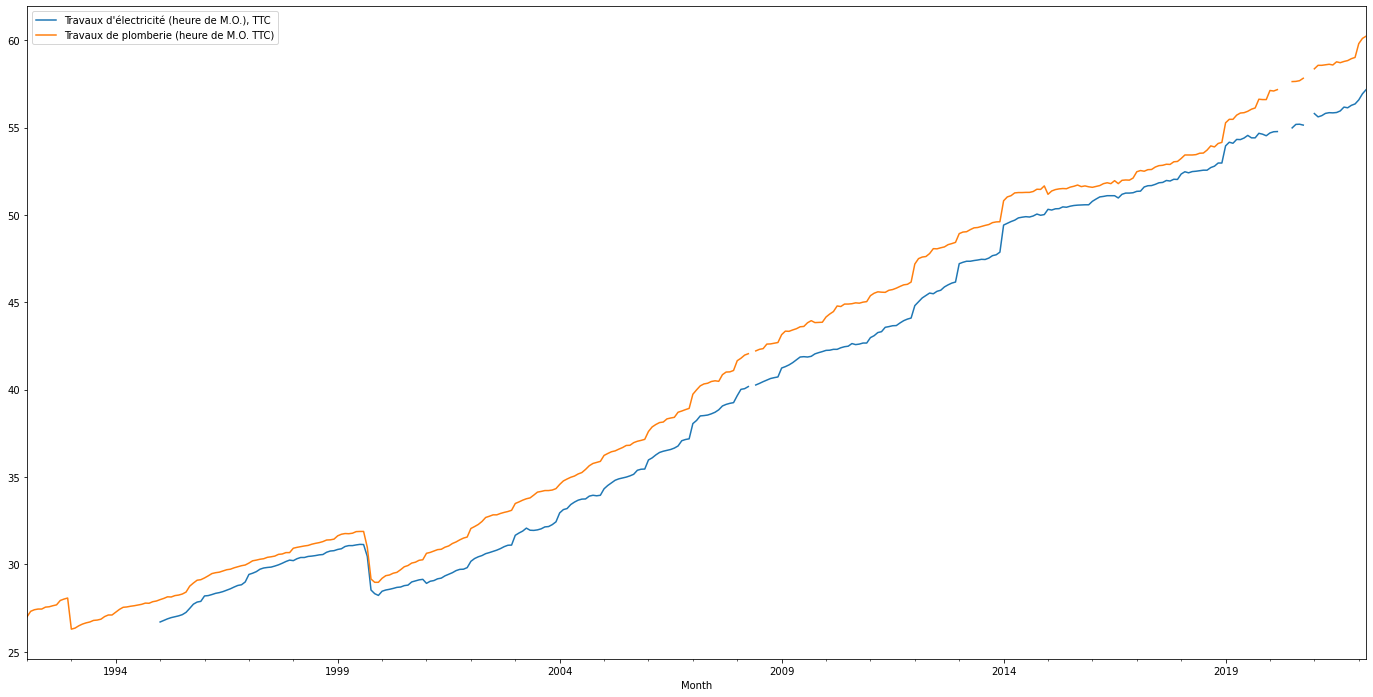

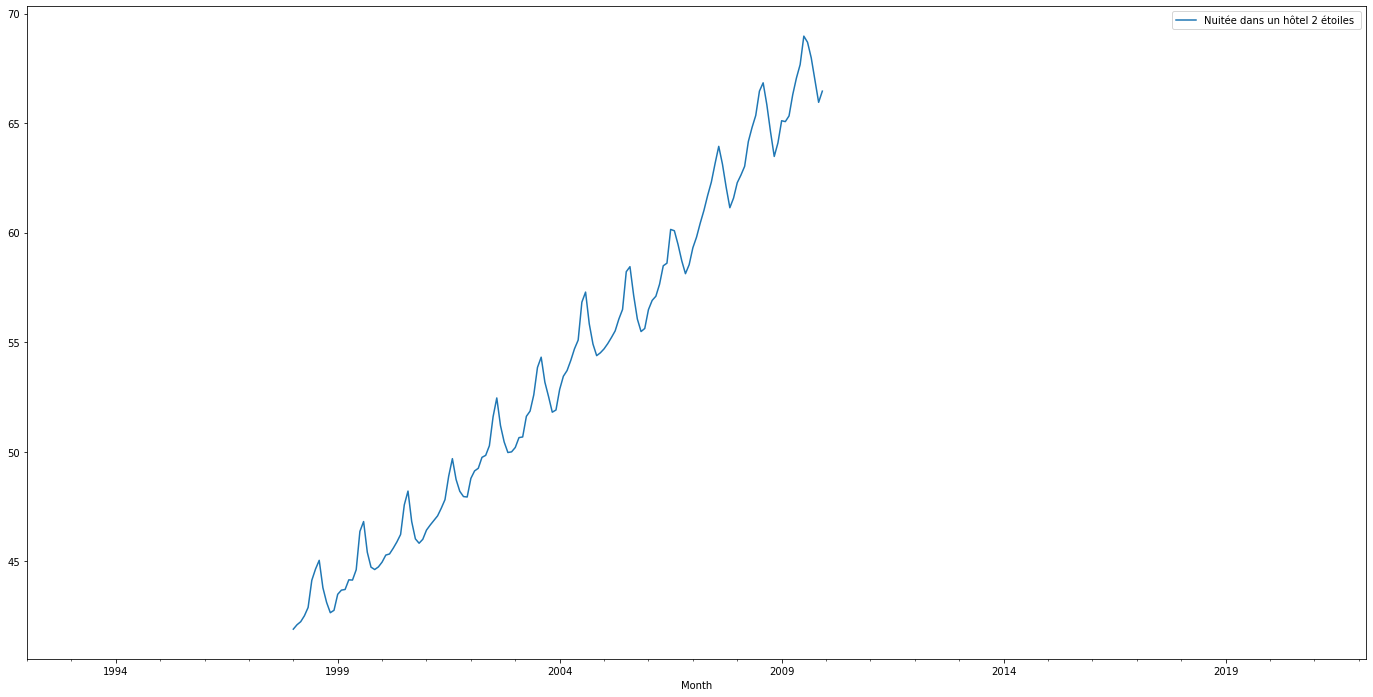

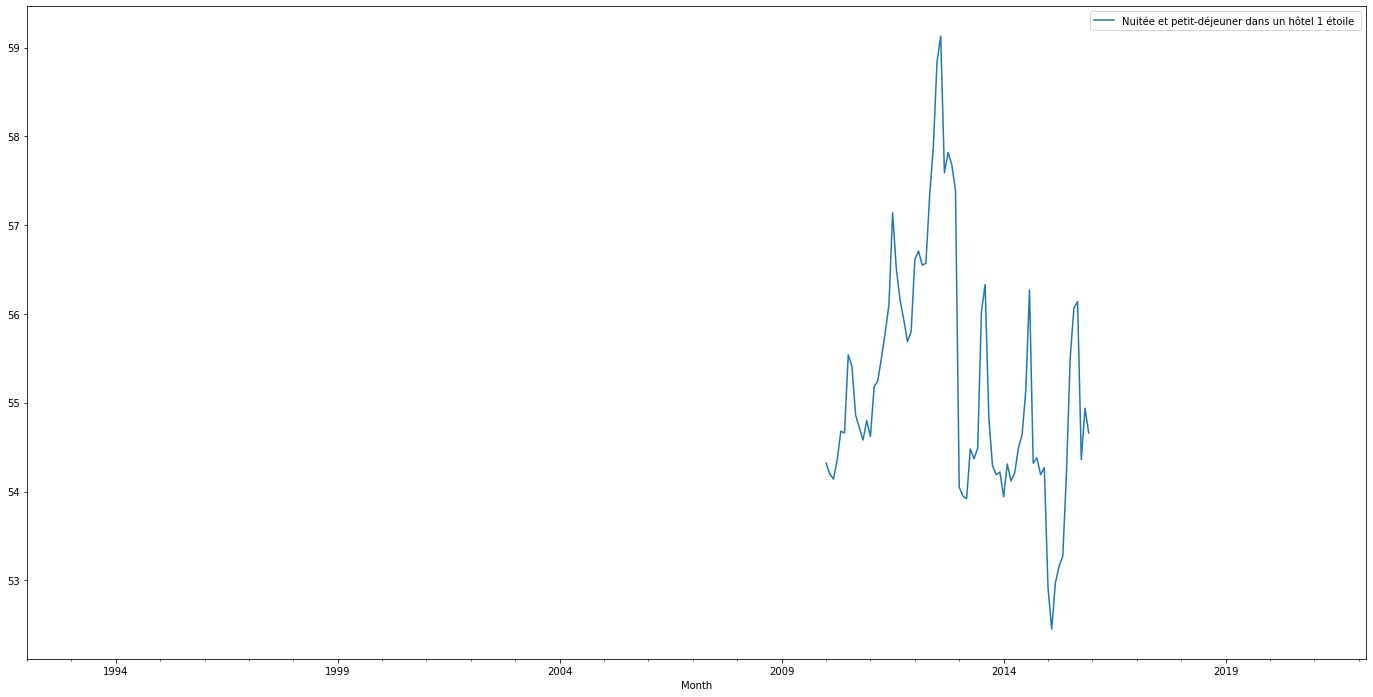

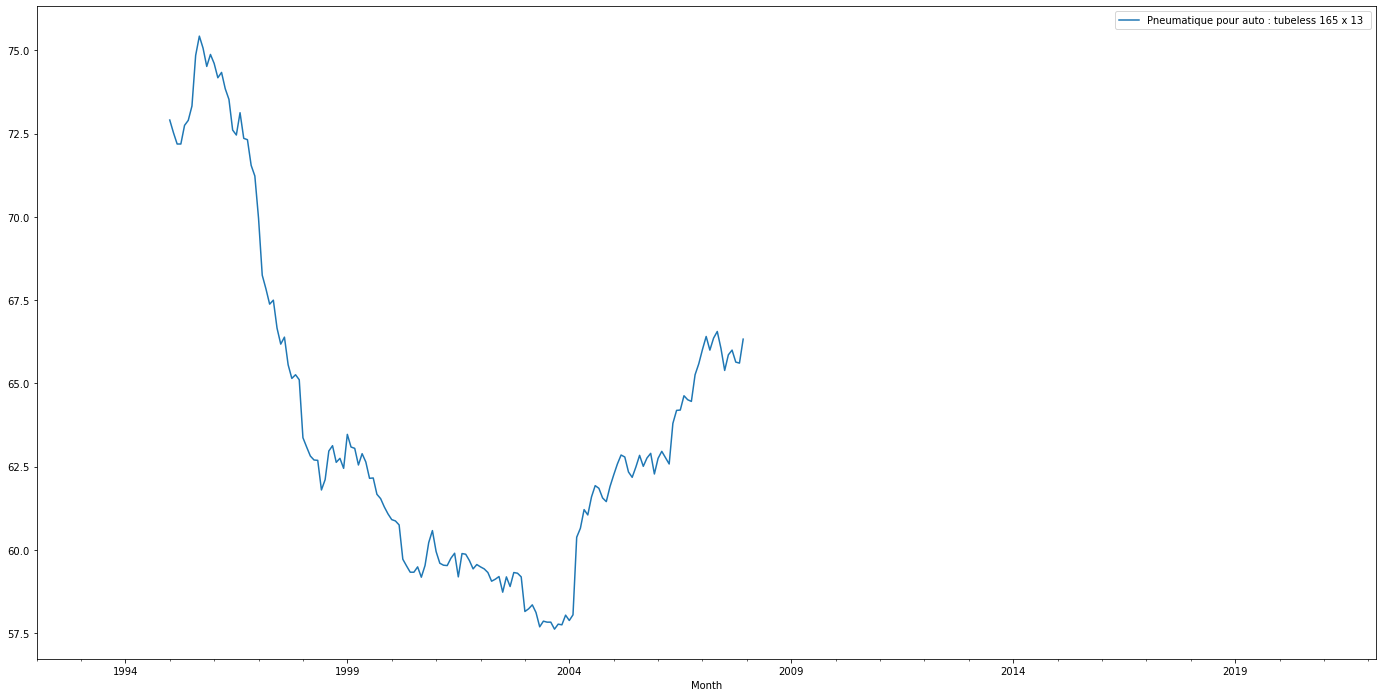

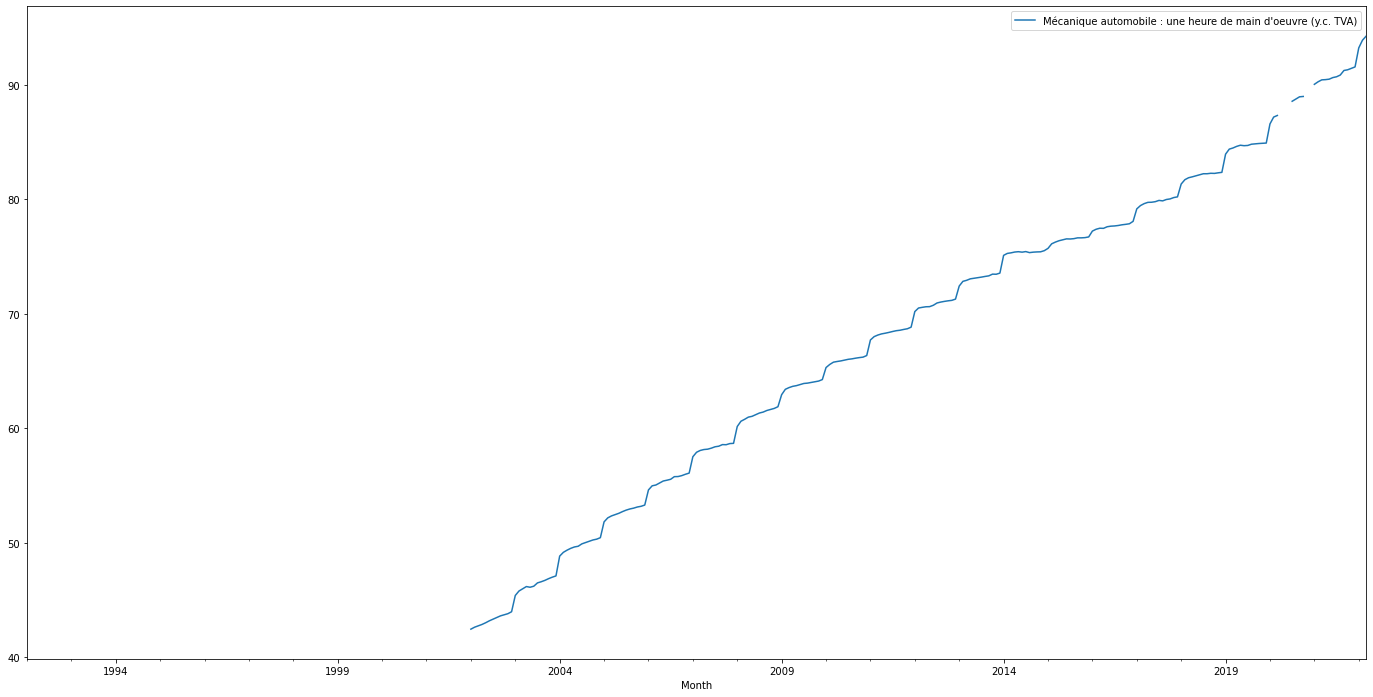

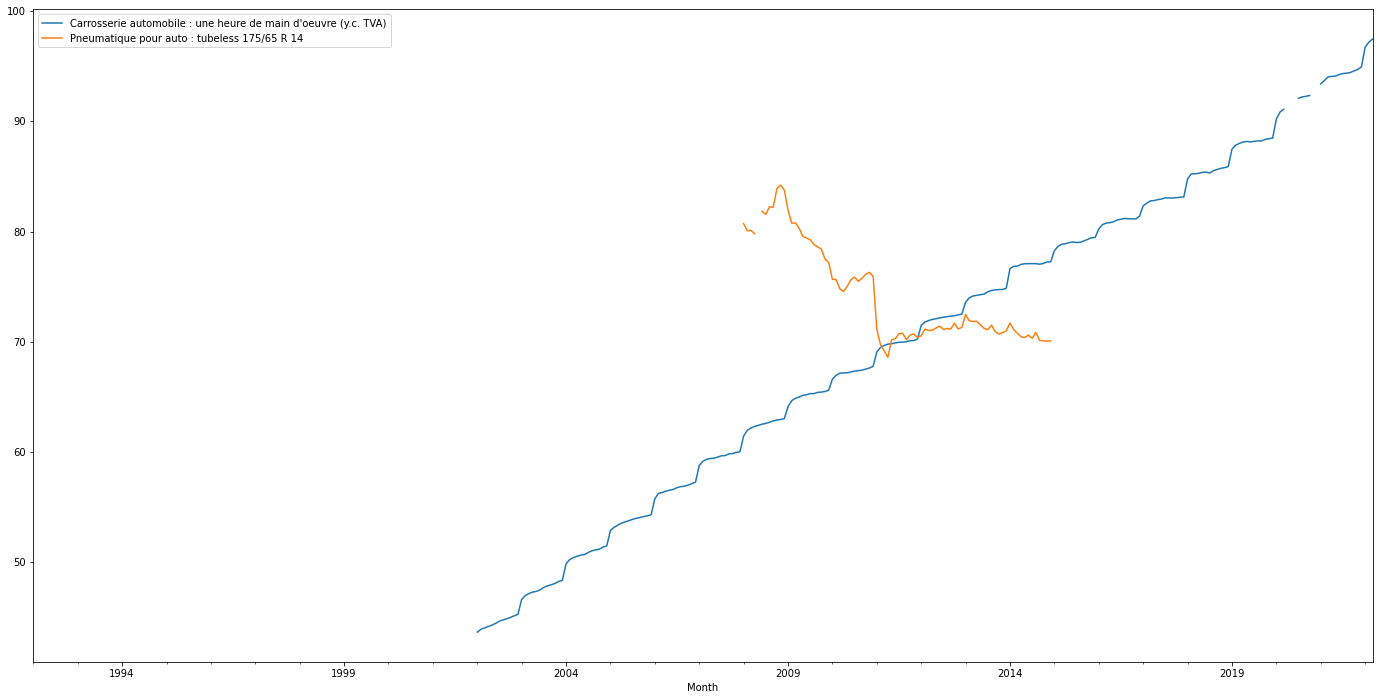

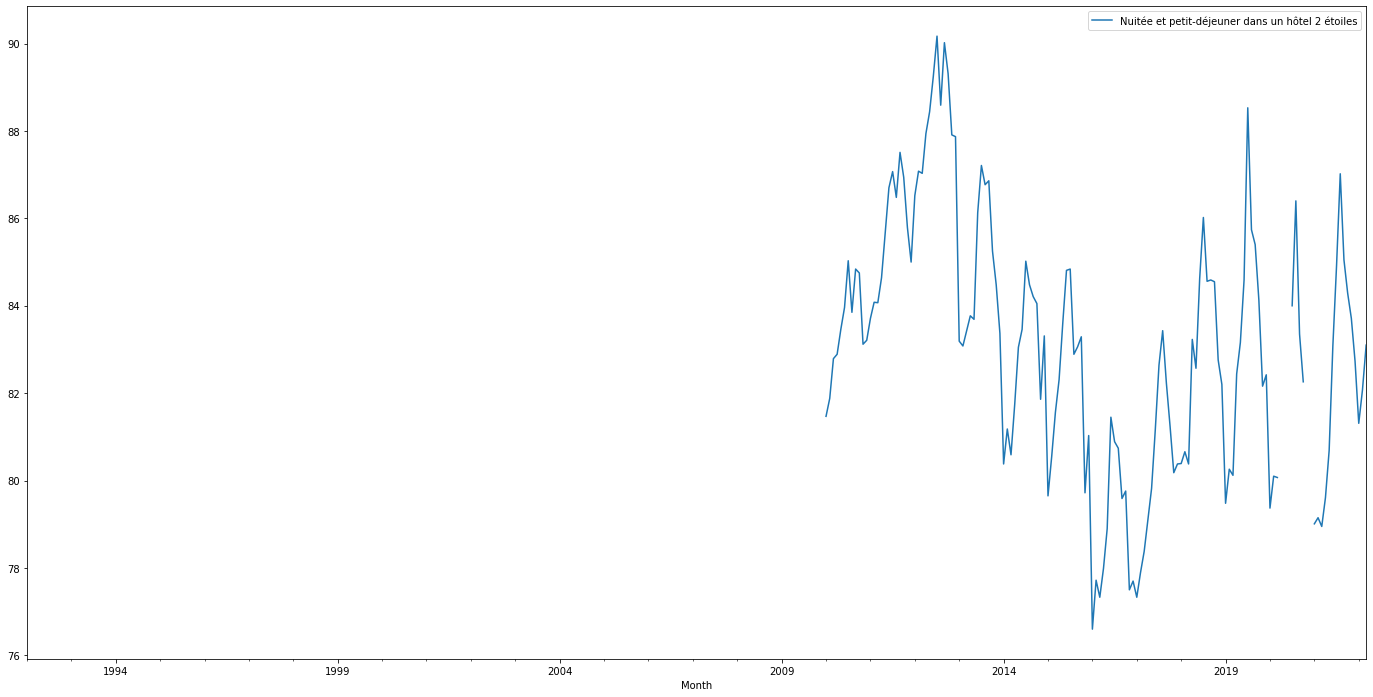

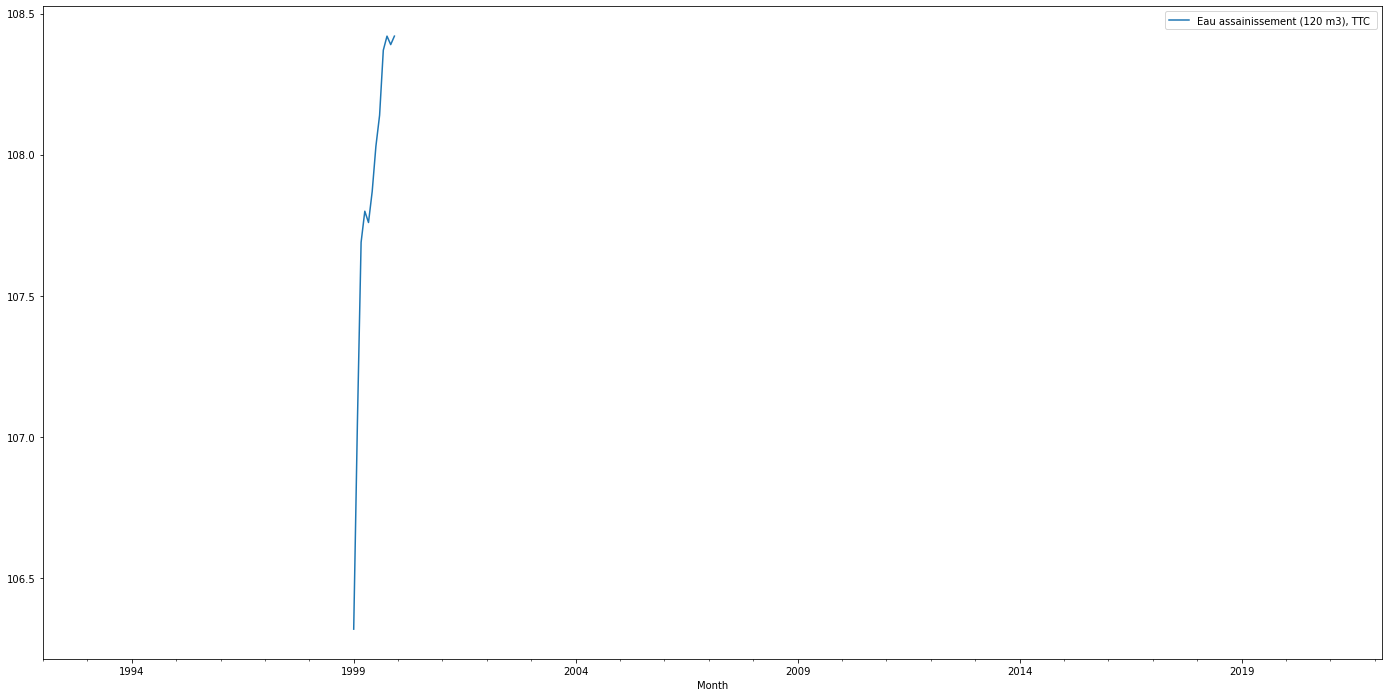

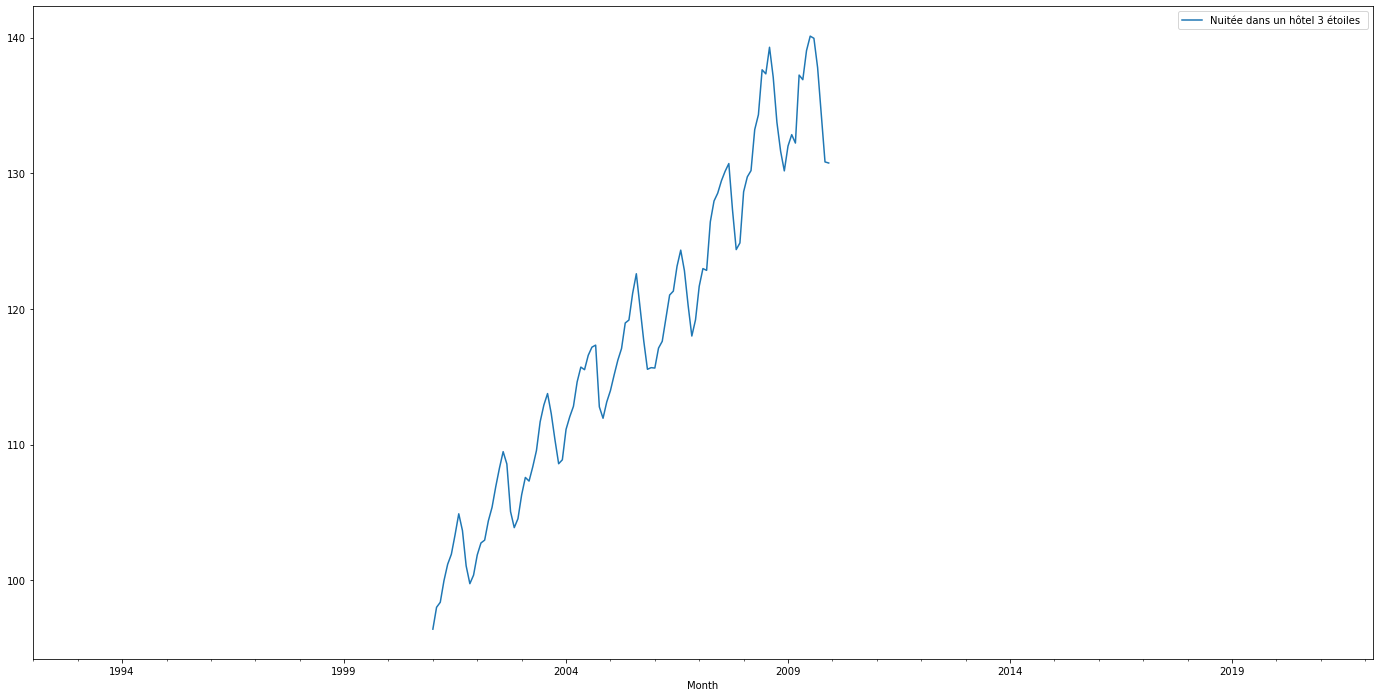

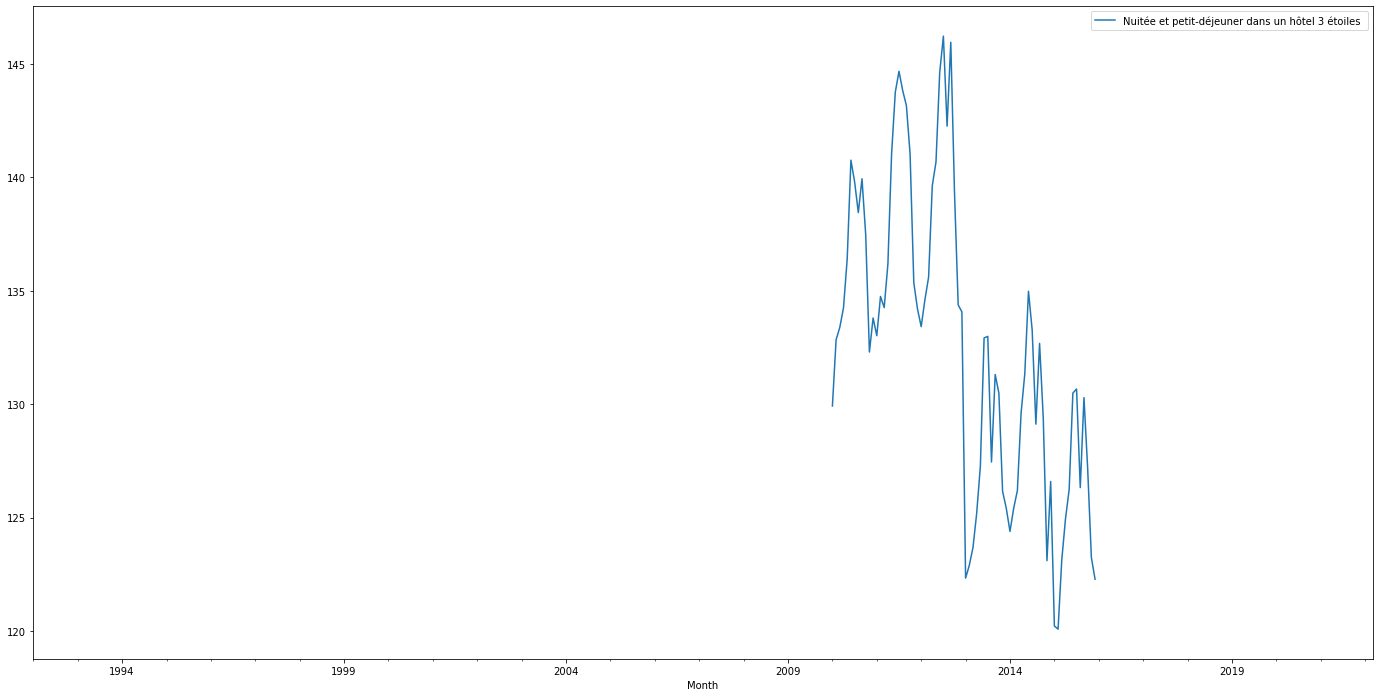

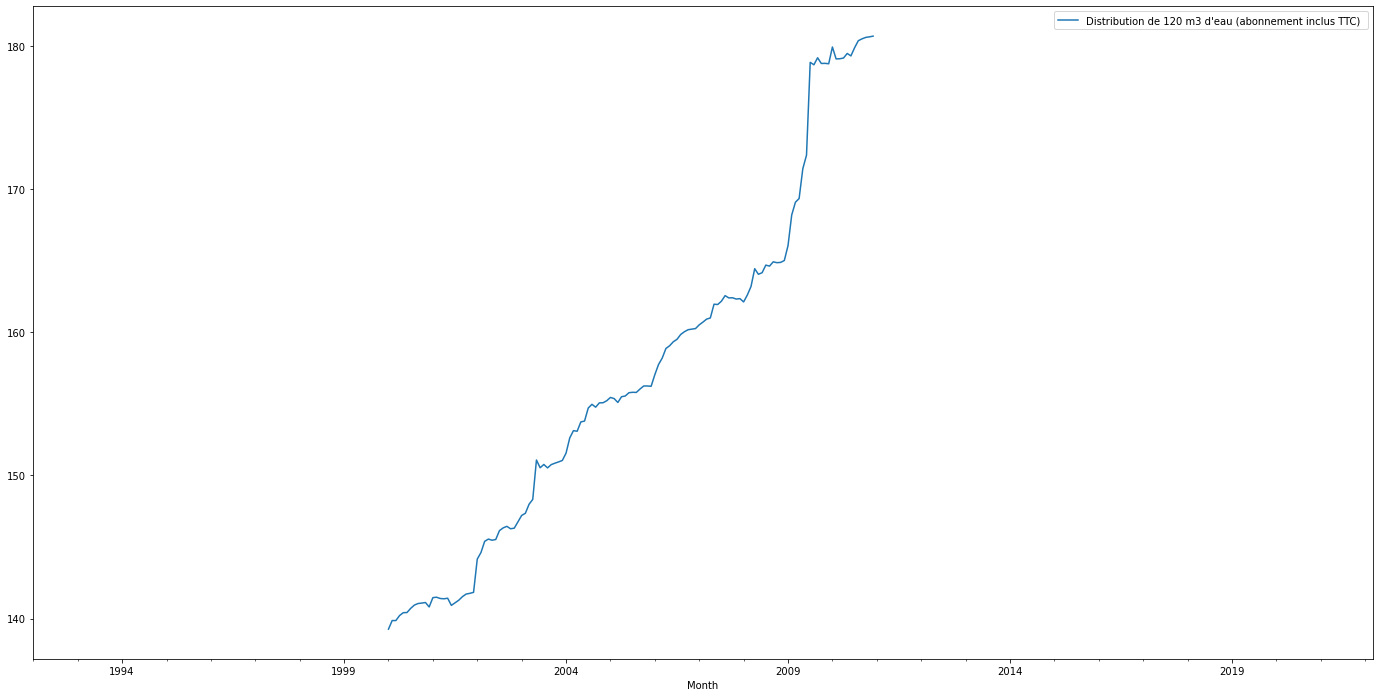

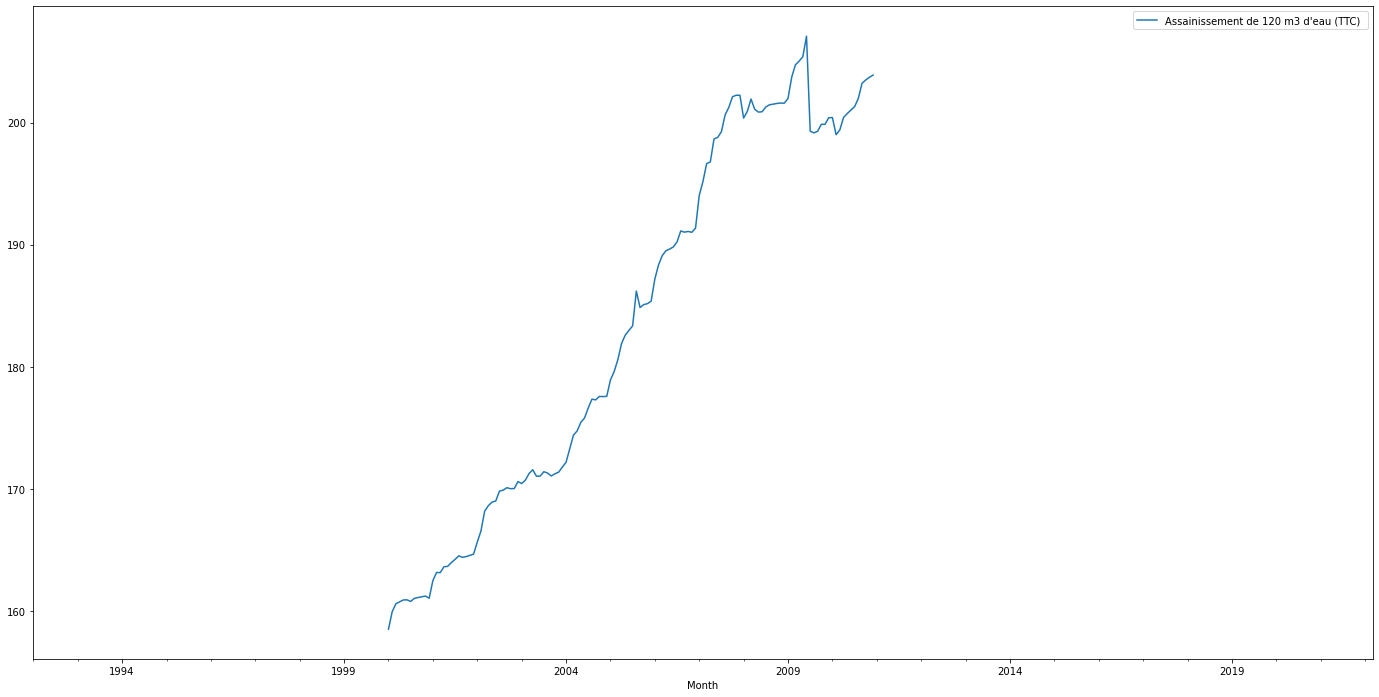

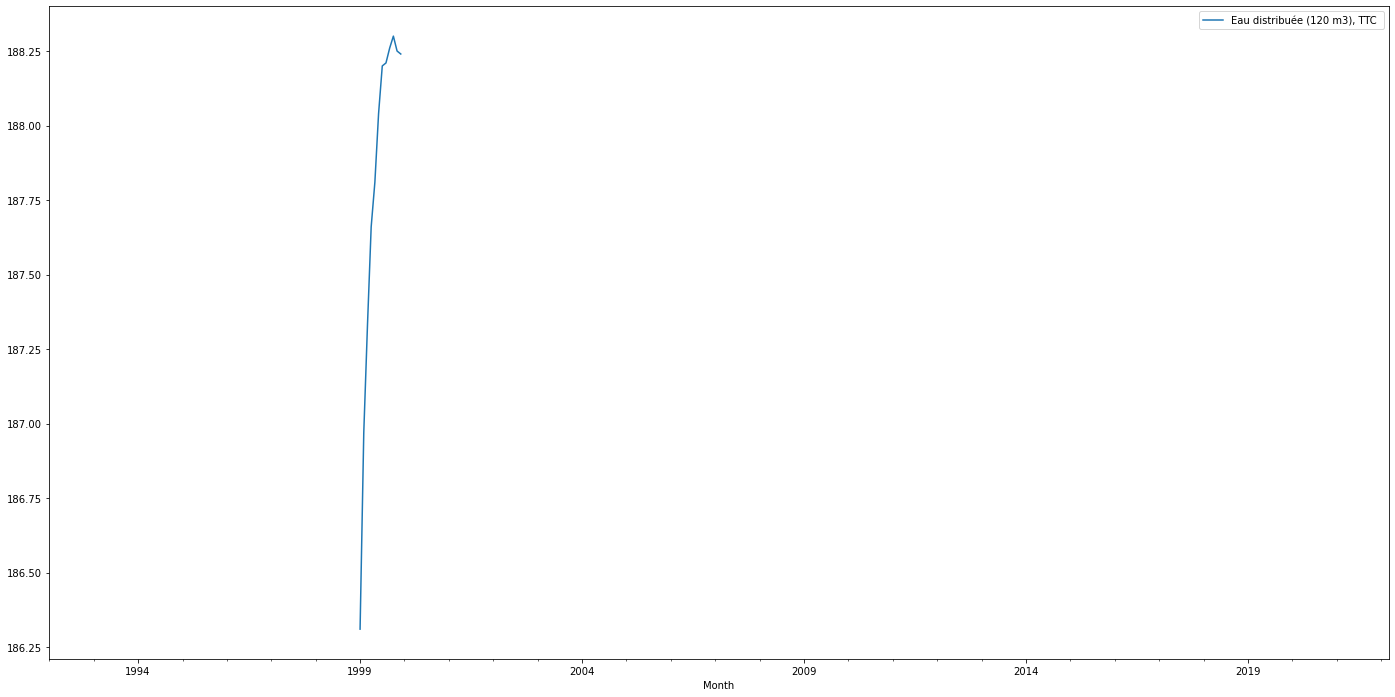

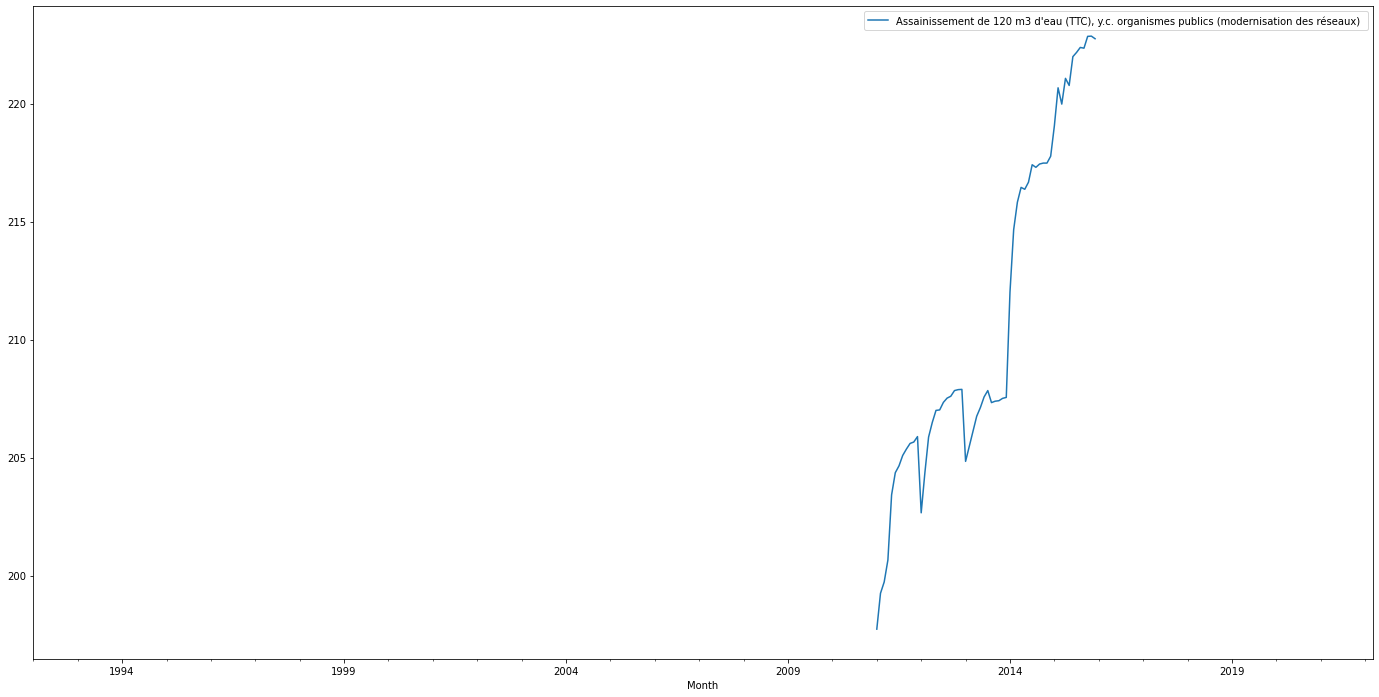

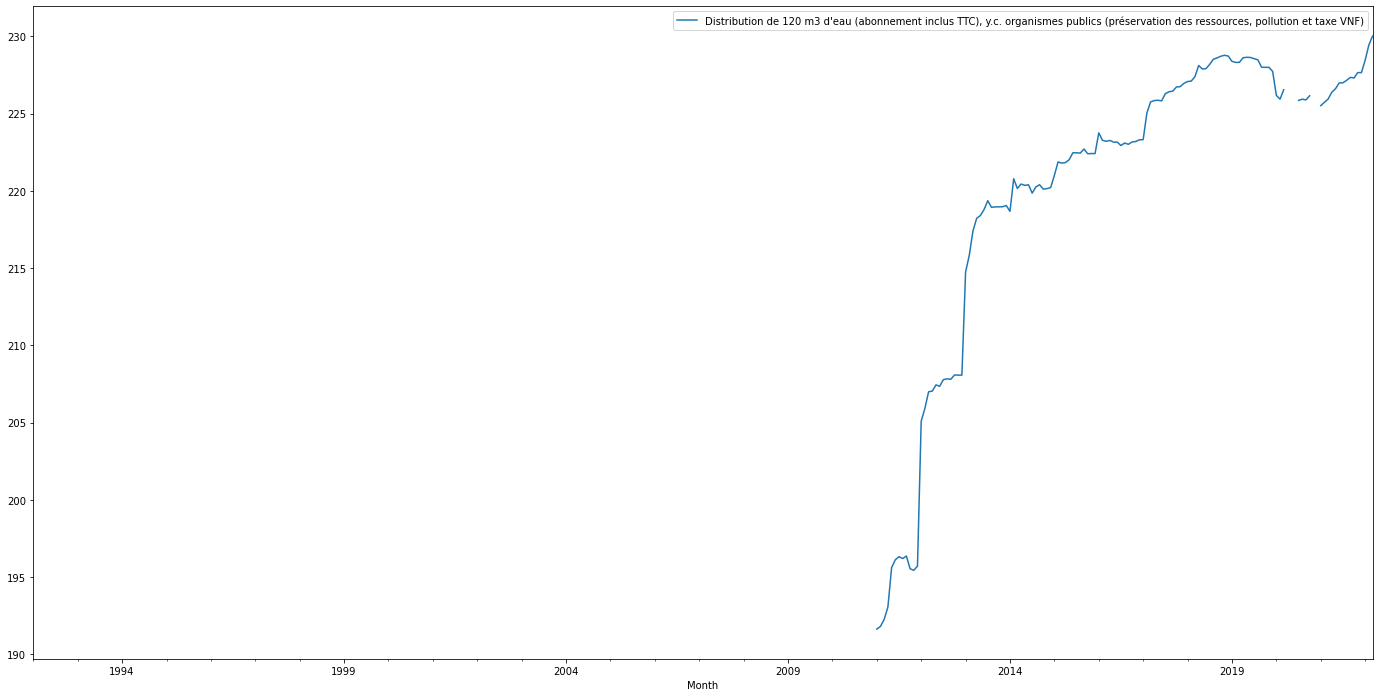

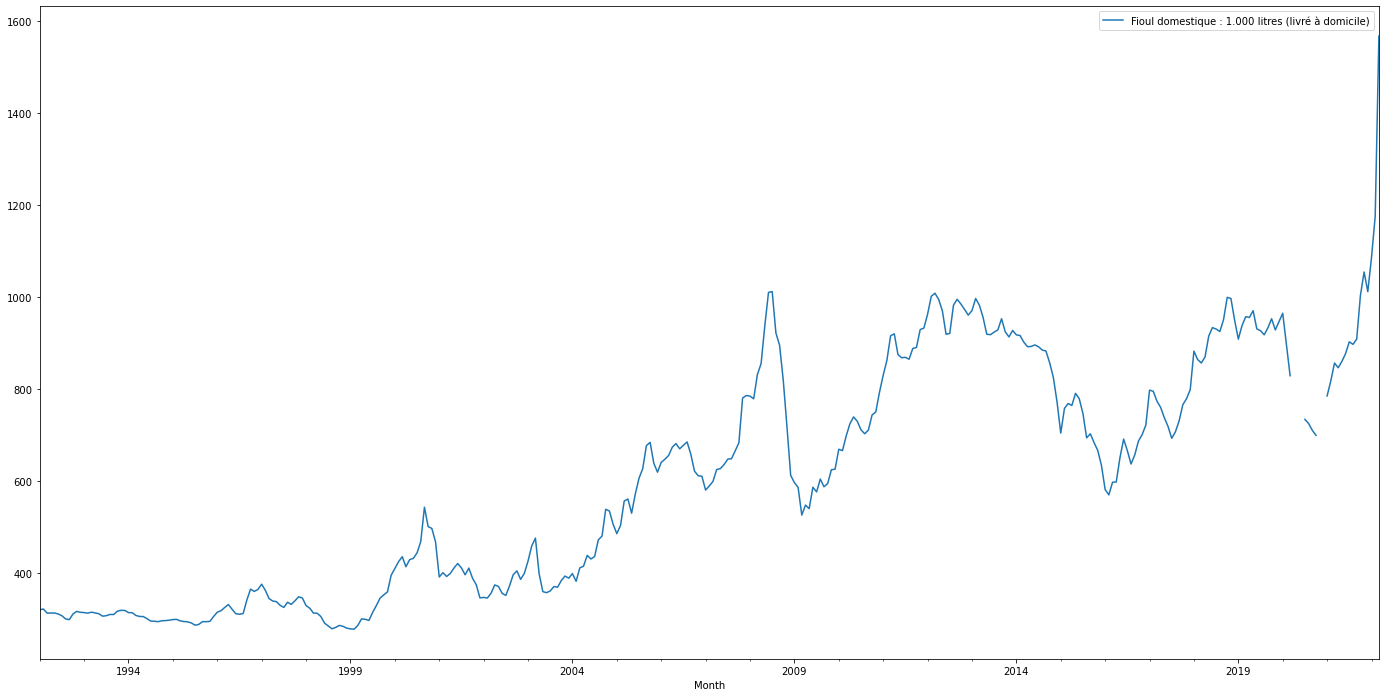

In [12]:
def draw_cols(cols):
    NC = len(cols)
    for x in range(0, NC, 10):
        df1.plot.line(x='Month', y=[col for col in cols[x:x+10]], figsize = (24, 12))

mean_prices = dict([(col , df1[col].mean()) for col in df1.columns if col != 'Month'])
global_mean_price = max([x[1] for x in mean_prices.items()])
#print(mean_prices)

for q in range(0, int(global_mean_price), 5):
    cols = [x[0] for x in mean_prices.items() if (x[1] >= q and x[1] < (q + 5))]
    cols = sorted(cols)
    if(len(cols) > 0):
        draw_cols(cols)
        